# Student-Friendly Guide to Feature Engineering Analysis

## 🎯 What Is Feature Engineering Really About?

Imagine you're a chef preparing ingredients for a meal. Raw ingredients (your original data) might need to be chopped, seasoned, mixed, or cooked before they create the perfect dish (your machine learning model). Feature engineering is the art and science of preparing your data ingredients to make them as useful as possible for your ML algorithms.

But here's the catch: different algorithms have different "tastes" - some love raw data, others need everything perfectly normalized, and some work best with completely transformed ingredients!

---

## 🧪 Part 1: Understanding Your Data's "Personality"

Before you can transform your data, you need to understand what you're working with. Think of this as a medical checkup for your variables!

### 📊 **The Basic Health Check**

#### Mean vs. Median: "Where's the Center?"
$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i \quad \text{vs.} \quad \text{Median} = Q_{0.5}$$

**Think of it like this:** You're measuring the "typical" value
- **Mean**: The balance point (sensitive to outliers)
- **Median**: The middle value when sorted (robust to outliers)

**Real Example - Income Data:**
- **Dataset**: $30K, $32K, $35K, $38K, $2M
- **Mean**: $427K (pulled up by the millionaire!)
- **Median**: $35K (the true "middle class" value)

**When they disagree**: Your data is probably skewed or has outliers!

#### Standard Deviation vs. MAD: "How Spread Out?"
$$s = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2} \quad \text{vs.} \quad \text{MAD} = 1.4826 \times \text{median}(|x_i - \text{median}|)$$

**Think of it like this:**
- **Standard Deviation**: "Typical distance from the mean" (outlier-sensitive)
- **MAD (Median Absolute Deviation)**: "Typical distance from the median" (outlier-robust)

**Why 1.4826?** It's a magic number that makes MAD comparable to standard deviation for normal data!

### 🎭 **Shape Detective Work**

#### Skewness: "Is Your Data Lopsided?"
$$\text{Skew} = \frac{n}{(n-1)(n-2)} \frac{\sum_{i=1}^{n}(x_i - \bar{x})^3}{s^3}$$

**Visual Intuition:**
- **Right-skewed (+)**: Like wealth distribution - long tail of rich people
- **Left-skewed (-)**: Like exam scores on easy tests - long tail of strugglers
- **Symmetric (≈0)**: Like height - equal tails on both sides

**Real Example - House Prices:**
Most houses cost $200K-$500K, but some mansions cost $5M+. This creates strong right skew!

#### Kurtosis: "How Extreme Are Your Extremes?"
$$\text{Kurt} = \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^{n}(x_i - \bar{x})^4}{s^4} - \frac{3(n-1)^2}{(n-2)(n-3)}$$

**Think of it like this:**
- **High kurtosis**: Like stock returns - frequent extreme movements
- **Low kurtosis**: Like uniform distribution - extremes are rare
- **Normal kurtosis (≈0)**: Just right amount of extremes

### 🚨 **Outlier Detection: Finding the Troublemakers**

#### IQR Method: "The 1.5× Rule"
$$\text{Outlier if } x_i < Q_1 - 1.5 \times IQR \text{ or } x_i > Q_3 + 1.5 \times IQR$$

**Think of it like this:** Imagine the middle 50% of your data lives in a comfortable neighborhood (the IQR). Outliers are those living way outside the neighborhood boundaries!

#### MAD-Based Z-Score: "Robust Distance Measurement"
$$Z_{\text{MAD}} = \frac{|x_i - \text{median}|}{\text{MAD}}$$

**Why better than regular Z-score?** Because one crazy outlier can't mess up the median and MAD!

**Example:**
- Dataset: 1, 2, 3, 4, 1000
- Regular Z-score: The 1000 affects both mean and std, making everything look "normal"
- MAD Z-score: The 1000 stands out clearly as an outlier

---

## ⚗️ Part 2: The Transformation Laboratory

### 🎪 **When Does Data Need Transformation?**

Your data might need help if:
- **Skewness |> 2.0**: Severely lopsided
- **Kurtosis > 6.0**: Too many extreme values
- **Jarque-Bera test p < 0.001**: Statistically very non-normal

Think of transformation as giving your data a makeover so ML algorithms can work with it better!

### 🔄 **Transformation Categories**

#### 1. **Rank Transformations: "Preserve the Order"**

**Simple Rank:**
$$R(x_i) = \frac{\text{rank}(x_i)}{n + \epsilon}$$

**Think of it like this:** Convert to race positions
- Fastest runner → rank 1
- Slowest runner → rank n
- Everyone gets evenly spaced values between 0 and 1

**Gaussian Rank:**
$$\Phi^{-1}\left(\frac{\text{rank}(x_i) - 0.5}{n + \epsilon}\right)$$

**Think of it like this:** Take the ranks and stretch them to look like a perfect bell curve!

**When to use:** When you care about order but not exact values, or when you have extreme outliers.

#### 2. **Power Transformations: "Find the Right Curve"**

**Box-Cox Transformation (for positive data):**
$$x^{(\lambda)} = \begin{cases} \frac{x^\lambda - 1}{\lambda} & \lambda \neq 0 \\ \log(x) & \lambda = 0 \end{cases}$$

**Think of it like this:** A family of curves that includes:
- **λ = 1**: No change (identity)
- **λ = 0.5**: Square root (moderate compression)
- **λ = 0**: Log transformation (strong compression)
- **λ = -1**: Reciprocal (extreme compression)

**Yeo-Johnson (works for any data):**
Like Box-Cox but handles negative values too!

**Real Example - Income Transformation:**
- Original: $30K, $50K, $100K, $1M (highly skewed)
- After log: 10.3, 10.8, 11.5, 13.8 (much more normal!)

#### 3. **Robust Transformations: "Outlier-Resistant Methods"**

**Asinh (Inverse Hyperbolic Sine):**
$$\sinh^{-1}(x) = \log(x + \sqrt{x^2 + 1})$$

**Think of it like this:** Like log transformation but works for negative values and doesn't blow up at zero!

**Winsorization: "Clip the Extremes"**
$$x_w = \max(\min(x, Q_{0.95}), Q_{0.05})$$

**Think of it like this:** Take the most extreme 5% of values and "clip" them to reasonable limits. It's like putting a speed limit on your data!

### 🎯 **The Transform Decision Tree**

```
Is your data roughly normal?
├─ YES → Use standardization or robust scaling
└─ NO → Is it severely skewed or heavy-tailed?
    ├─ YES → Try Box-Cox, Yeo-Johnson, or asinh
    └─ MAYBE → Try rank transformation or quantile transformation
```

---

## 🏆 Part 3: Feature Importance - Who Are the MVPs?

### 🎵 **The Ensemble Approach: "Listen to Multiple Experts"**

$$\text{Importance}(X_j) = w_1 I_{\text{imp}} + w_2 I_{\text{perm}} + w_3 I_{\text{MI}} + w_4 I_{\text{lin}}$$

**Think of it like this:** Instead of asking one expert, ask four different experts and average their opinions!

#### **Expert 1: Tree-Based Importance**
$$I_{\text{imp}}(X_j) = \frac{1}{T}\sum_{t=1}^{T} \sum_{v \in \text{splits}_j^{(t)}} p(v) \cdot \Delta_{\text{impurity}}(v)$$

**What it says:** "How much does this feature help when I'm making decisions in my tree?"

**Real Example:** In predicting house prices:
- Square footage might have high tree importance (lots of helpful splits)
- Bathroom color might have low importance (not useful for splits)

#### **Expert 2: Permutation Importance**
$$I_{\text{perm}}(X_j) = \mathbb{E}[\text{Score}(\text{original}) - \text{Score}(\text{permuted } X_j)]$$

**The Process:**
1. Train model on original data → get performance score
2. Randomly shuffle just one feature → retrain → get new score
3. How much did performance drop? That's the importance!

**Think of it like this:** "If I scrambled this feature completely, how much would my model suffer?"

#### **Expert 3: Mutual Information**
$$I_{\text{MI}}(X_j) = I(X_j; Y)$$

**What it says:** "How much does knowing this feature reduce my uncertainty about the target?"

#### **Expert 4: Linear Importance (Ridge Regression)**
$$I_{\text{lin}}(X_j) = |\beta_j|$$

**What it says:** "In a linear model, how much does this feature's coefficient matter?"

### 🎯 **Robust Normalization**
$$I_{\text{norm}}(X_j) = \frac{\max(0, I(X_j) - Q_{0.05})}{Q_{0.95} - Q_{0.05} + \epsilon}$$

**Think of it like this:** Instead of using mean/std (sensitive to outliers), use percentiles to normalize importance scores. Bottom 5% becomes 0, top 5% becomes 1.

### 🔄 **Cross-Validation for Stability**
- **K-fold CV (K=5)**: Split data into 5 parts, train on 4, test on 1, repeat
- **Multiple runs**: Average results across different random splits
- **Ensemble models**: Use Random Forest, XGBoost, LightGBM, etc.

**Why all this complexity?** Because we want importance scores that are reliable, not just lucky flukes!

---

## 🤝 Part 4: Interaction Detection - Finding Feature Friendships

### 🔍 **What Are Feature Interactions?**

**Think of it like this:** Sometimes 1 + 1 = 3! Features that seem unimportant alone can become powerful when combined.

**Real Example - Pizza Sales:**
- **Temperature alone**: Moderate predictor
- **Day of week alone**: Moderate predictor  
- **Temperature × Weekend**: Strong predictor! (Hot weekends = high sales)

### 🚫 **Screening Out the Boring Pairs**

#### **Collinearity Check**
$$\max(|\rho_{\text{Pearson}}(X_i, X_j)|, |\rho_{\text{Spearman}}(X_i, X_j)|) > 0.95$$

**Think of it like this:** If two features are basically saying the same thing, we don't need to check their "interaction" - they're just copies!

### 🎭 **Nonlinear Dependence Detective Work**

#### **Distance Correlation: "The Universal Detector"**
$$\text{dCor}(X,Y) = \frac{\text{dCov}(X,Y)}{\sqrt{\text{dVar}(X)\text{dVar}(Y)}}$$

**Superpower:** Detects ANY type of relationship (linear, curved, circular, you name it!)

**Think of it like this:** Instead of looking at values directly, look at the pattern of distances between all pairs of points.

#### **HSIC: "Kernel-Based Relationship Detector"**
$$\text{HSIC}(X,Y) = \frac{1}{(n-1)^2}\text{tr}(\mathbf{K}_X \mathbf{H} \mathbf{K}_Y \mathbf{H})$$

**Think of it like this:** 
1. Create "similarity maps" for X and Y using Gaussian kernels
2. See if the patterns in these similarity maps match up
3. High HSIC = strong dependence, low HSIC = independence

### 🎯 **Target-Aware Validation**

#### **Ridge R² Gain Test**
Compare two models:
- **Model 1**: $y = \beta_0 + \beta_1 X_i + \beta_2 X_j + \epsilon$
- **Model 2**: $y = \beta_0 + \beta_1 X_i + \beta_2 X_j + \beta_3 X_i X_j + \epsilon$

$$\Delta R^2 = R^2_{\text{interaction}} - R^2_{\text{main}}$$

**The Question:** Does adding the interaction term actually help predict the target?

### 🛠️ **Interaction Transform Library**

#### **Basic Operations:**
- **Multiplicative**: Height × Weight (BMI-like measure)
- **Ratio**: Income ÷ Age (earning rate per year)
- **Difference**: |Score1 - Score2| (performance gap)
- **Average**: (X + Y)/2 (combined effect)

#### **Advanced Operations:**
- **Euclidean norm**: √(X² + Y²) (magnitude of vector)
- **Angular**: arctan2(Y, X) (direction of vector)
- **Min/Max**: Capture boundary effects
- **RBF kernel**: exp(-(X-Y)²/2σ²) (similarity measure)

**Real Example - Credit Scoring:**
- **Income × Credit_History**: High income + good history = excellent credit
- **Debt ÷ Income**: Debt-to-income ratio (crucial for lending!)
- **|Age - 25|**: Distance from "risky age" for insurance

---

## 🏷️ Part 5: Categorical Encoding - Handling Non-Numeric Data

### 🎯 **The Cardinality Decision Tree**

**Cardinality = number of unique categories**

```
How many unique categories?
├─ 2-5 (Low) → One-Hot Encoding
├─ 6-20 (Medium) → Target Encoding or Ordinal
└─ 20+ (High) → Hashing or Frequency Encoding
```

### 🔢 **Low Cardinality (2-5 categories): One-Hot Encoding**

**Example - Color:**
- Original: ['Red', 'Blue', 'Green', 'Red', 'Blue']
- After encoding:
  ```
  Red  Blue  Green
   1    0     0     (Red)
   0    1     0     (Blue)  
   0    0     1     (Green)
   1    0     0     (Red)
   0    1     0     (Blue)
  ```

**Why drop one column?** To avoid "multicollinearity" - if you know Red=0 and Blue=0, then Green must be 1!

### 🎯 **Medium Cardinality (6-20): Target Encoding**

#### **Target Encoding with Cross-Validation**
$$\bar{y}_c = \mathbb{E}[Y | X = c]$$

**The Process:**
1. **For each category**, calculate the average target value
2. **Replace category names** with these averages
3. **Use cross-validation** to prevent overfitting!

**Real Example - City vs. Income:**
- New York: Average income $75K → encode as 75000
- Small Town: Average income $35K → encode as 35000

**⚠️ Overfitting Danger:** Without CV, your model might memorize the training data!

#### **Weight of Evidence (WOE)**
$$\text{WOE}_c = \log\frac{P(Y=1|X=c)}{P(Y=0|X=c)}$$

**Think of it like this:** For binary targets, how much does this category "tilt" toward positive vs. negative outcomes?

**Example - Loan Default by Job:**
- Doctor: Low default rate → negative WOE
- Unemployed: High default rate → positive WOE

### 🏗️ **High Cardinality (20+): Advanced Techniques**

#### **Frequency Encoding**
$$f_c = \frac{\text{count}(X = c)}{n}$$

**Think of it like this:** Replace categories with how often they appear. Common categories get high values, rare ones get low values.

**Example - Product ID:**
- iPhone (appears 1000 times) → 0.1
- Obscure gadget (appears 10 times) → 0.001

#### **Hash Encoding**
$$h(c) \mod m$$

**Think of it like this:** Use a hash function to map category names to a fixed number of buckets. Multiple categories might share buckets, but that's okay!

**When to use:** When you have thousands of categories and need to control dimensionality.

### 🛡️ **Leak Prevention Strategies**

**The Problem:** Target encoding can "leak" future information into your model!

**Solutions:**
1. **Cross-validation**: Compute encodings on out-of-fold data only
2. **Smoothing**: Add noise to prevent exact memorization
3. **Regularization**: Blend category averages with global averages

---

## 🔗 Part 6: Multicollinearity - When Features Are Too Friendly

### 🚨 **Variance Inflation Factor (VIF)**

$$\text{VIF}_j = \frac{1}{1 - R_j^2}$$

**The Process:**
1. **Pick feature j**
2. **Regress it** against all other features: $X_j = \beta_0 + \sum_{k \neq j} \beta_k X_k$
3. **Calculate R²** for this regression
4. **Apply VIF formula**

**Think of it like this:** "How well can I predict this feature using all the other features?"
- **VIF = 1**: Perfectly independent (R² = 0)
- **VIF = 5**: Moderately correlated (R² = 0.8)
- **VIF = 10**: Highly correlated (R² = 0.9)
- **VIF = ∞**: Perfect correlation (R² = 1)

### 🎯 **Interpretation Guide**
- **VIF < 5**: ✅ No problem
- **5 ≤ VIF < 10**: ⚠️ Moderate concern  
- **VIF ≥ 10**: 🚨 High multicollinearity (action needed!)

### 🛠️ **Remediation Strategies**

#### **1. Principal Component Analysis (PCA)**
$$\mathbf{Y} = \mathbf{X}\mathbf{W}$$

**Think of it like this:** Find new "composite features" that capture most of the information but are guaranteed to be independent.

**Real Example:** Instead of Height, Weight, BMI (highly correlated), create:
- PC1: "Overall body size" (captures 80% of variance)
- PC2: "Height vs. weight ratio" (captures 15% of variance)

#### **2. Ridge Regularization**
**Think of it like this:** Shrink all coefficients toward zero, which naturally handles multicollinearity.

#### **3. Feature Selection**
**Think of it like this:** From each group of highly correlated features, keep only the most important one.

---

## ⚡ Part 7: Computational Efficiency - Working with Big Data

### 📊 **Smart Subsampling Strategy**

**The Problem:** Your dataset has 10 million rows, but computing interactions takes forever!

**The Solution - Stratified PC Sampling:**
1. **Project to first principal component** (captures most variation)
2. **Divide PC1 scores into quartiles** (4 strata)
3. **Sample uniformly within each stratum**
4. **Result:** Representative sample that preserves data structure!

### 📏 **Sample Size Guidelines**
- **General analysis**: 20,000 samples max
- **Interaction detection**: 6,000 samples max  
- **Distance correlation**: 3,000 samples max
- **HSIC computation**: 1,200 samples max

**Why these limits?** Balance between computational feasibility and statistical reliability.

### 🎯 **Progressive Screening Strategy**

**Think of it like this:** Use cheap tests to filter candidates before running expensive tests.

**The Pipeline:**
1. **Correlation screening** (fast) → Remove obvious duplicates
2. **Mutual information** (medium speed) → Find interesting pairs
3. **Distance correlation** (slow) → Validate the most promising pairs
4. **Target validation** (expensive) → Final confirmation

---

## 🎪 Part 8: Putting It All Together - The Complete Pipeline

### 🎯 **The Feature Engineering Decision Framework**

#### **Step 1: Data Health Checkup**
```python
for each feature:
    compute_robust_statistics()
    detect_outliers()
    assess_normality()
    recommend_transforms()
```

#### **Step 2: Feature Ranking**
```python
importance_scores = ensemble_ranking(
    tree_importance, 
    permutation_importance, 
    mutual_information, 
    linear_importance
)
```

#### **Step 3: Interaction Discovery**
```python
for each promising_pair:
    if not_too_correlated(pair):
        nonlinear_strength = compute_dependence(pair)
        if nonlinear_strength > threshold:
            target_gain = validate_with_target(pair)
            if target_gain > gain_threshold:
                add_to_interaction_library(pair)
```

#### **Step 4: Categorical Encoding**
```python
for each categorical_feature:
    cardinality = count_unique_values()
    if cardinality <= 5:
        apply_onehot_encoding()
    elif cardinality <= 20:
        apply_target_encoding_with_cv()
    else:
        apply_frequency_or_hash_encoding()
```

#### **Step 5: Multicollinearity Check**
```python
vif_scores = compute_vif_for_all_features()
problematic_features = vif_scores > 10
recommend_dimensionality_reduction(problematic_features)
```

---

## 💡 Part 9: Common Student Pitfalls & How to Avoid Them

### 🚫 **"Transform Everything" Fallacy**
**Wrong thinking:** "More transformations = better model!"
**Reality:** Unnecessary transformations add noise and complexity.
**Solution:** Only transform when statistical tests indicate it's needed.

### 🚫 **"One-Size-Fits-All Encoding" Fallacy**
**Wrong thinking:** "Always use one-hot encoding for categorical data!"
**Reality:** High-cardinality categories create thousands of sparse columns.
**Solution:** Match encoding strategy to cardinality and data size.

### 🚫 **"Correlation = Interaction" Fallacy**
**Wrong thinking:** "If features are correlated, their interaction is important!"
**Reality:** Highly correlated features usually have redundant interactions.
**Solution:** Screen out high correlations before interaction detection.

### 🚫 **"Target Leakage" Trap**
**Wrong thinking:** "Use future information to encode categories - it works!"
**Reality:** Your model will fail miserably on new data.
**Solution:** Always use cross-validation for target-based encodings.

### 🚫 **"VIF Doesn't Matter" Fallacy**
**Wrong thinking:** "Machine learning algorithms handle multicollinearity automatically!"
**Reality:** High VIF can make models unstable and coefficients uninterpretable.
**Solution:** Check VIF, especially for linear models and when interpretability matters.

---

## 🎯 Part 10: Real-World Applications & Examples

### 🏠 **Real Estate Price Prediction**

**Original Features:** 
- Square footage, bedrooms, bathrooms, age, location

**Feature Engineering:**
- **Transformations:** Log(price), sqrt(square_footage) (right-skewed data)
- **Interactions:** sqft × bedrooms (total space utilization)
- **Ratios:** price_per_sqft, bathroom_per_bedroom
- **Categorical:** neighborhood → target encoding (high cardinality)

### 🏥 **Medical Diagnosis**

**Original Features:**
- Age, blood pressure, cholesterol, symptoms

**Feature Engineering:**
- **Robust scaling:** Medical measurements often have outliers
- **Interactions:** age × blood_pressure (risk amplifies with age)
- **Winsorization:** Cap extreme vital signs at 95th percentile
- **Binary encoding:** symptoms (present/absent) → one-hot

### 💰 **Credit Risk Assessment**

**Original Features:**
- Income, debt, credit history, employment

**Feature Engineering:**
- **Ratios:** debt_to_income (crucial financial ratio)
- **Target encoding:** profession → default rate (many categories)
- **Interactions:** income × credit_score (amplifying effects)
- **Binning:** age → age_groups (nonlinear risk patterns)

### 📱 **Customer Churn Prediction**

**Original Features:**
- Usage patterns, billing, demographics, support contacts

**Feature Engineering:**
- **Trend features:** usage_change_last_3_months
- **Frequency encoding:** phone_model (high cardinality)
- **Interactions:** support_contacts × bill_amount (frustration indicator)
- **Normalization:** usage_per_dollar_spent

---

## 🚀 Part 11: Advanced Tips for Practice

### 🎨 **The Visualization-First Approach**
1. **Always plot distributions** before choosing transformations
2. **Create interaction plots** for top pairs before engineering
3. **Monitor VIF changes** as you add features
4. **Validate encoding quality** with target relationship plots

### 🔄 **The Iterative Refinement Strategy**
1. **Start simple:** Basic transformations and top features only
2. **Add complexity gradually:** Interactions, advanced encodings
3. **Monitor performance:** Does each addition actually help?
4. **Prune aggressively:** Remove features that don't contribute

### 🎯 **Domain-Specific Guidelines**
- **Finance:** Focus on ratios and risk interactions
- **Healthcare:** Emphasize robust methods (outliers common)
- **E-commerce:** Heavy use of categorical encodings (products, users)
- **Time series:** Add lag features and temporal interactions

### 🔬 **Experimental Validation**
- **A/B test feature sets:** Compare model performance with/without engineering
- **Cross-validation stability:** Ensure engineered features work across folds
- **Out-of-time testing:** Validate that encodings work on future data

---

## 🎪 Summary: Your Feature Engineering Toolkit

### 🏆 **The Essential Checklist**

**📊 Data Understanding:**
- ✅ Compute robust statistics (median, MAD, percentiles)
- ✅ Detect outliers (IQR method, MAD Z-score)
- ✅ Assess normality (Jarque-Bera, Shapiro-Wilk)

**⚗️ Transformations:**
- ✅ **Severe skew**: Box-Cox, Yeo-Johnson, log
- ✅ **Moderate skew**: asinh, rank transformation
- ✅ **Outliers**: Winsorization, robust scaling
- ✅ **Normal data**: Standardization

**🏆 Feature Selection:**
- ✅ **Ensemble ranking**: Tree + permutation + MI + linear
- ✅ **Cross-validation**: Stable importance scores
- ✅ **Robust normalization**: Percentile-based scaling

**🤝 Interaction Detection:**
- ✅ **Screen correlations**: Remove redundant pairs
- ✅ **Nonlinear dependence**: Distance correlation, HSIC
- ✅ **Target validation**: Ridge R² gain test

**🏷️ Categorical Encoding:**
- ✅ **Low cardinality (2-5)**: One-hot encoding
- ✅ **Medium cardinality (6-20)**: Target encoding with CV
- ✅ **High cardinality (20+)**: Frequency or hash encoding

**🔗 Multicollinearity:**
- ✅ **Compute VIF**: Check for problematic correlations
- ✅ **VIF > 10**: Consider PCA, regularization, or feature removal

### 🎯 **The Golden Rules**

1. **🎨 Visualize first, engineer second** - Always plot your data!
2. **🔄 Iterate carefully** - Add complexity gradually
3. **🛡️ Validate rigorously** - Use cross-validation everywhere
4. **⚖️ Balance complexity vs. benefit** - Simple often wins
5. **🎯 Domain knowledge trumps algorithms** - Understand your problem first

*Remember: Feature engineering is both art and science. The algorithms provide the science, but your domain knowledge and creativity provide the art. The best feature engineers are those who understand their data deeply and can ask the right questions about what transformations and interactions might reveal hidden patterns!* ✨🔬

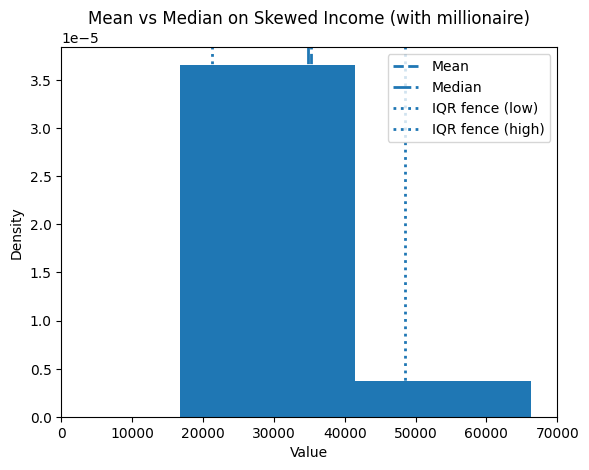

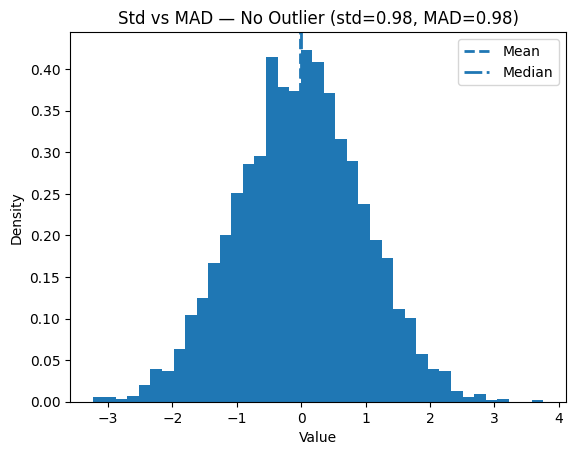

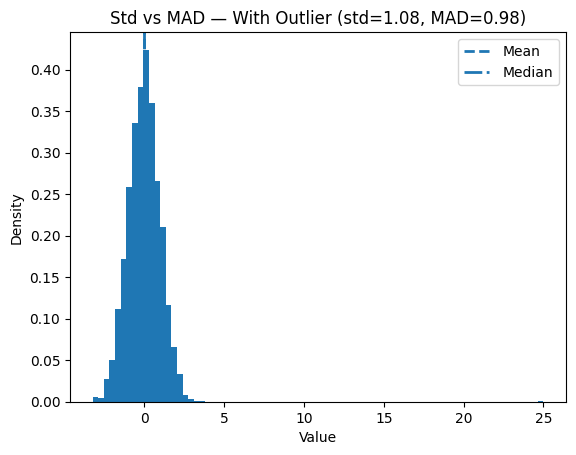

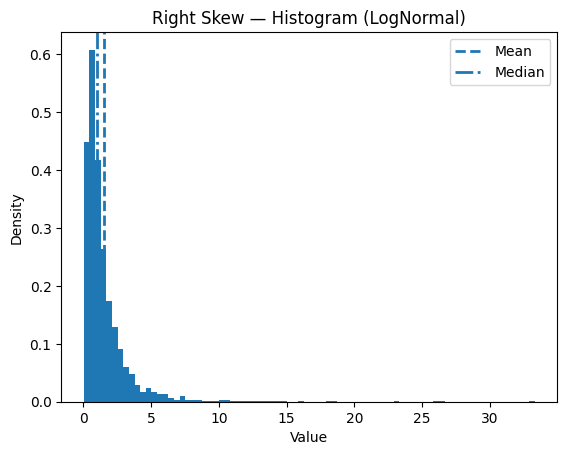

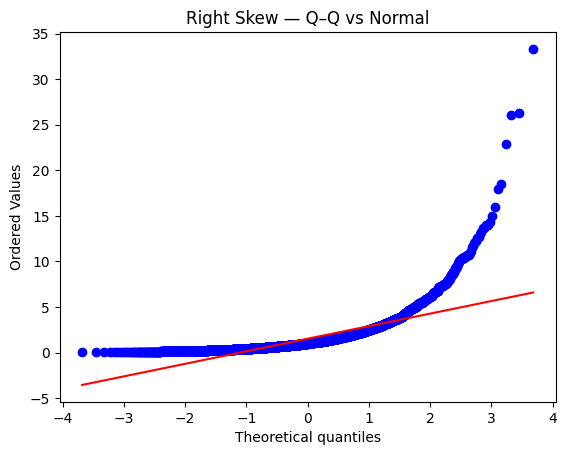

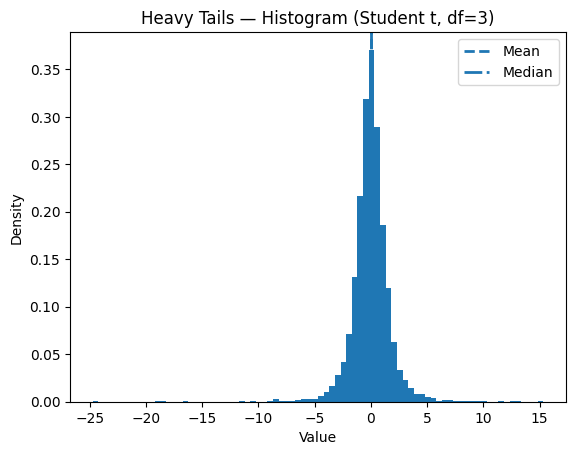

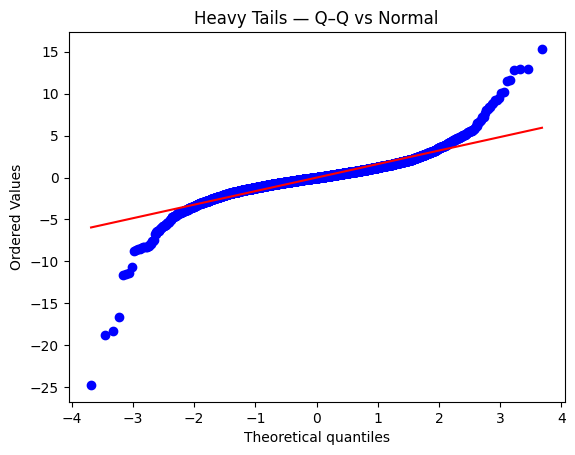

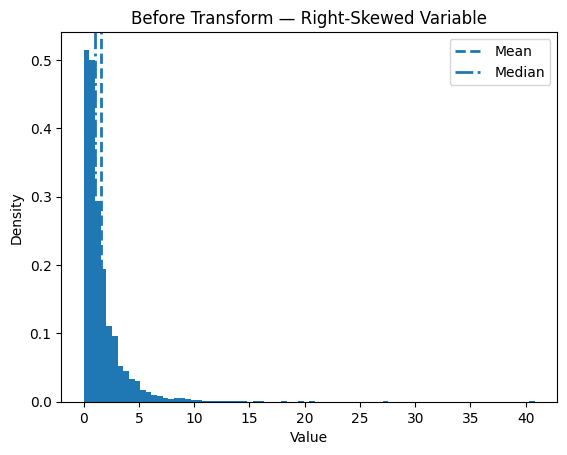

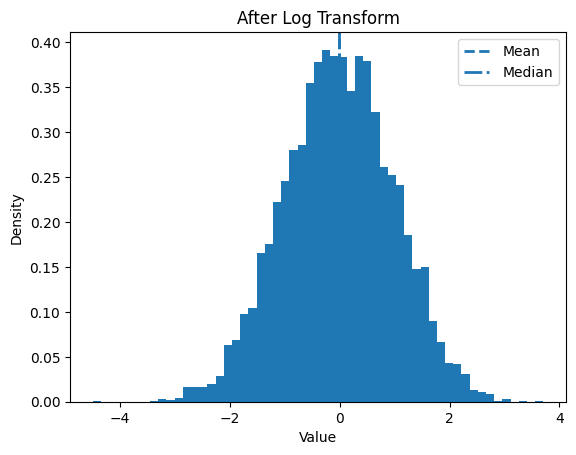

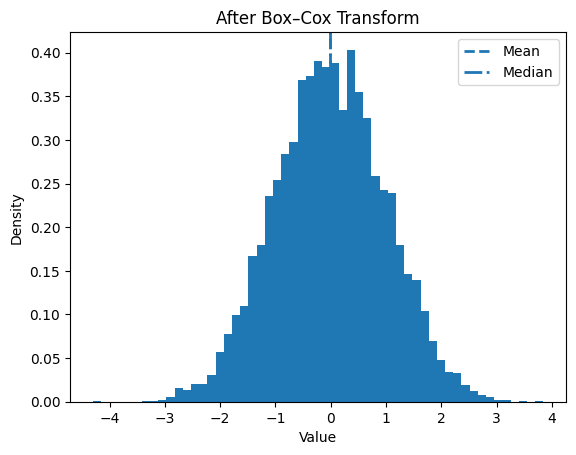

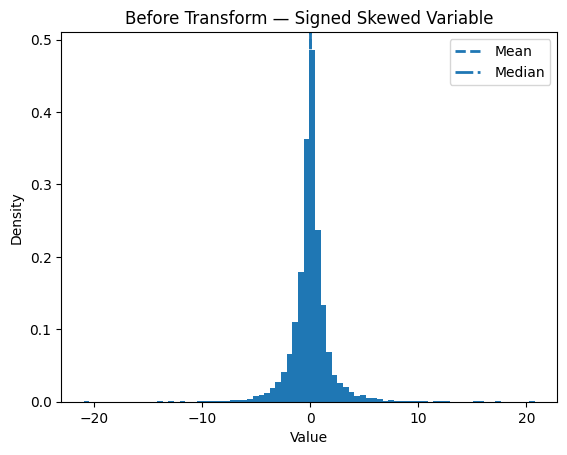

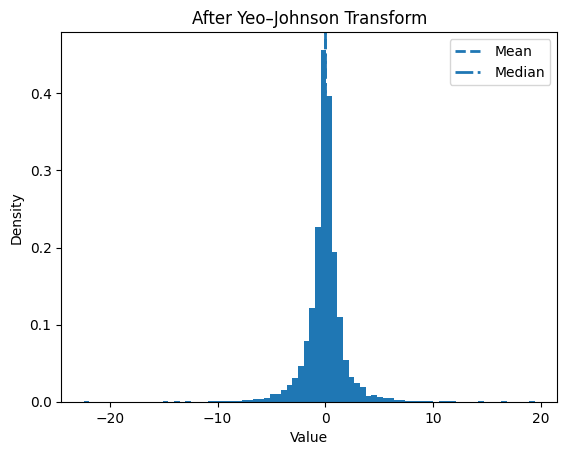

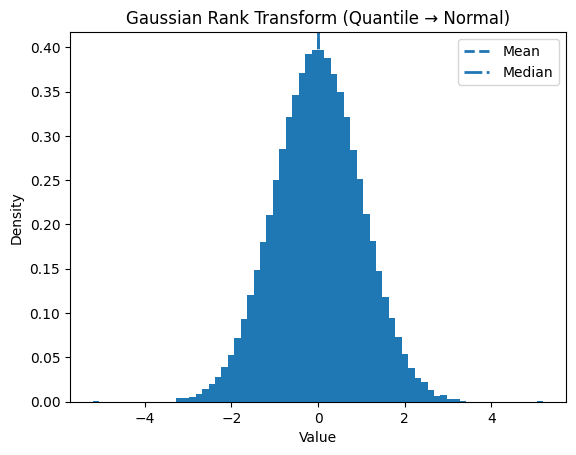

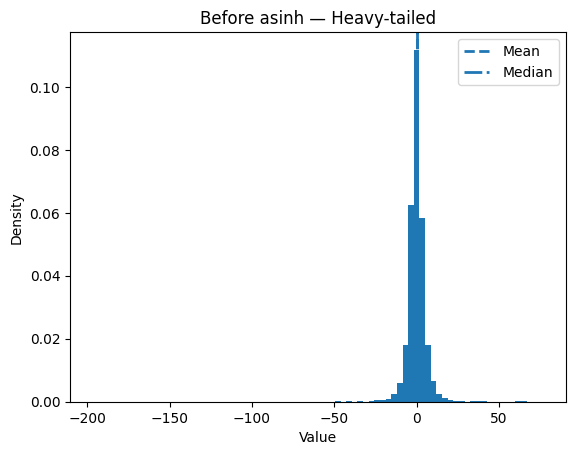

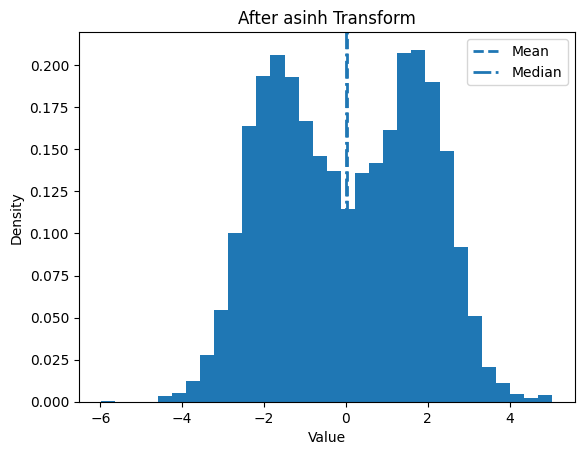

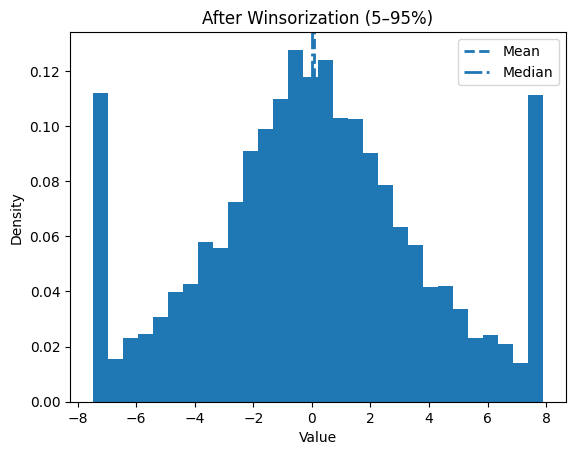

Displaying table: Feature importance components & ensemble score
feature  tree_importance  permutation_importance  mutual_information  ridge_abs_coef  ensemble_score
     X1           0.6717                  1.8542              0.6173          2.6669          1.0000
     X3           0.2955                  0.8173              0.2705          0.1085          0.3622
     X2           0.0129                  0.0184              0.0092          0.1767          0.0165
     X4           0.0199                  0.0331              0.0096          0.0126          0.0045


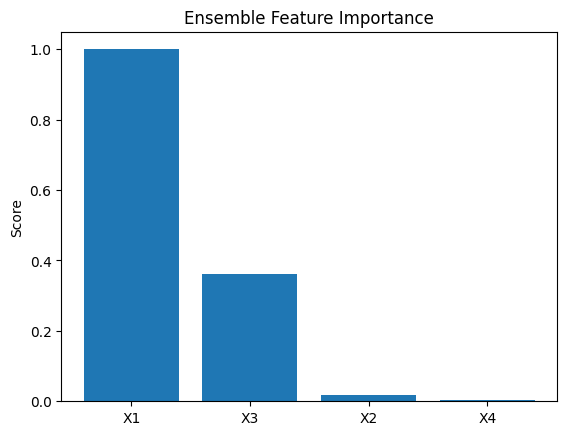

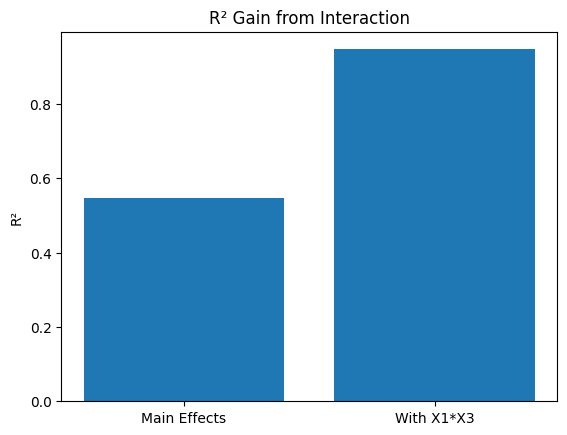

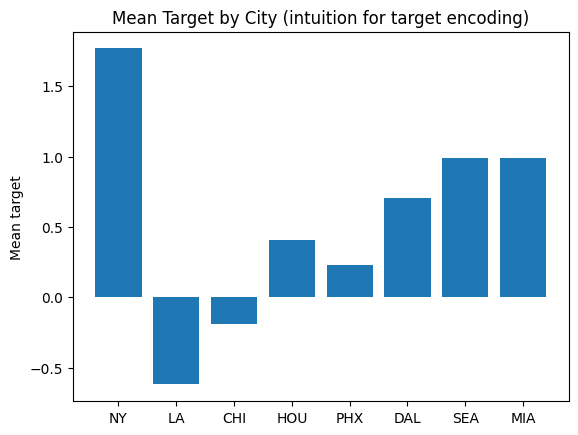

Displaying table: VIF demo (correlated features)
feature  R2_against_others    VIF
     Z1              0.948 19.093
     Z2              0.903 10.346
     Z3              0.852  6.741


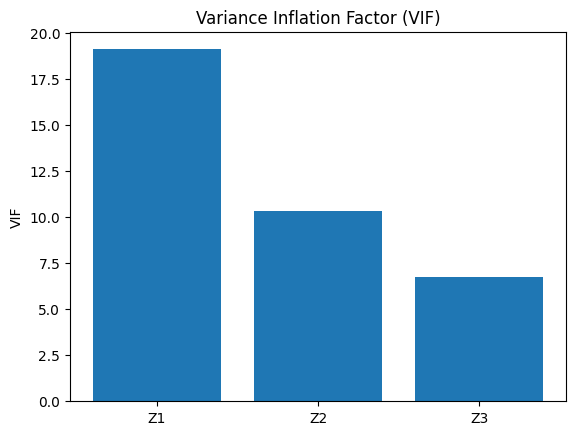

In [4]:
# Feature Engineering Illustration Lab
# -----------------------------------
# This script builds synthetic datasets and produces Matplotlib figures
# to illustrate key parts of your "Student-Friendly Guide to Feature Engineering".
# Charts follow the constraints:
#  - matplotlib only (no seaborn)
#  - one chart per figure
#  - do not set specific colors or styles (use defaults)
#
# It will also compute small tables (displayed interactively) with robust stats
# and feature importance components used in the ensemble ranking section.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, StandardScaler, RobustScaler
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# ---------- Helpers ----------

def freedman_diaconis_bins(x, min_bins=10, max_bins=80):
    x = np.asarray(x)
    x = x[np.isfinite(x)]
    n = x.size
    if n <= 1:
        return min_bins
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    if iqr <= 0:
        return min_bins
    bin_width = 2 * iqr / np.cbrt(n)
    if bin_width <= 0:
        return min_bins
    bins = int(np.ceil((x.max() - x.min()) / bin_width))
    return int(np.clip(bins, min_bins, max_bins))

def plot_hist_with_markers(x, title, show_iqr=False, savepath=None, xlim=None):
    
    bins = freedman_diaconis_bins(x)
    fig = plt.figure()
    plt.hist(x, bins=bins, density=True)
    m = np.mean(x)
    med = np.median(x)
    plt.axvline(m, linestyle="--", linewidth=2, label="Mean")
    plt.axvline(med, linestyle="-.", linewidth=2, label="Median")
    if show_iqr:
        q1, q3 = np.percentile(x, [25, 75])
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        plt.axvline(lower, linestyle=":", linewidth=2, label="IQR fence (low)")
        plt.axvline(upper, linestyle=":", linewidth=2, label="IQR fence (high)")
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Density")
    if xlim:
        plt.xlim(xlim)
    plt.legend()
    if savepath:
        fig.savefig(savepath, dpi=144, bbox_inches="tight")
    plt.show()

def qq_plot(x, title, savepath=None):
    fig = plt.figure()
    stats.probplot(x, dist="norm", plot=plt)
    plt.title(title)
    if savepath:
        fig.savefig(savepath, dpi=144, bbox_inches="tight")
    plt.show()

def barplot(values, labels, title, ylabel=None, savepath=None, rotation=0):
    fig = plt.figure()
    x = np.arange(len(values))
    plt.bar(x, values)
    plt.xticks(x, labels, rotation=rotation)
    plt.title(title)
    if ylabel:
        plt.ylabel(ylabel)
    if savepath:
        fig.savefig(savepath, dpi=144, bbox_inches="tight")
    plt.show()

def display_dataframe_to_user(name, df):
    """
    Display a DataFrame interactively to the user.
    This function is a placeholder for the actual implementation that would
    show the DataFrame in a user interface.
    """
    print(f"Displaying table: {name}")
    print(df.to_string(index=False))  # For simplicity, just print it here
    # In practice, you would use a library like ace_tools to display it interactively

def display_table(name, df):
    display_dataframe_to_user(name, df)

# ---------- Part 1: Data "Health Check" ----------

rng = np.random.default_rng(7)

# Mean vs Median (income-like with a millionaire outlier)
income = np.concatenate([rng.normal(35_000, 5_000, 5000), [2_000_000]])
plot_hist_with_markers(income, "Mean vs Median on Skewed Income (with millionaire)", show_iqr=True, xlim=(0, 70_000))

# Std vs MAD robustness demo (add a single extreme outlier)
base = rng.normal(0, 1, 3000)
with_outlier = np.concatenate([base, [25.0]])

def robust_stats(x):
    mean = np.mean(x)
    std = np.std(x, ddof=1)
    med = np.median(x)
    mad = 1.4826 * np.median(np.abs(x - med))
    return mean, std, med, mad

mean0, std0, med0, mad0 = robust_stats(base)
mean1, std1, med1, mad1 = robust_stats(with_outlier)

# Plot before/after outlier (two separate figures)
plot_hist_with_markers(base, f"Std vs MAD — No Outlier (std={std0:.2f}, MAD={mad0:.2f})")
plot_hist_with_markers(with_outlier, f"Std vs MAD — With Outlier (std={std1:.2f}, MAD={mad1:.2f})")

# Skewness & Kurtosis example (right skew, heavy tails)
lognorm = rng.lognormal(mean=0.0, sigma=0.9, size=6000)
t_heavy = rng.standard_t(df=3, size=6000)

plot_hist_with_markers(lognorm, "Right Skew — Histogram (LogNormal)")
qq_plot(lognorm, "Right Skew — Q–Q vs Normal")

plot_hist_with_markers(t_heavy, "Heavy Tails — Histogram (Student t, df=3)")
qq_plot(t_heavy, "Heavy Tails — Q–Q vs Normal")

# ---------- Part 2: Transformation Laboratory ----------

# Start from a right-skewed positive variable
x_pos = rng.lognormal(0.0, 1.0, 6000)

# Log transform
x_log = np.log(x_pos + 1e-9)  # safe
plot_hist_with_markers(x_pos, "Before Transform — Right-Skewed Variable")
plot_hist_with_markers(x_log, "After Log Transform")

# Box-Cox (needs strictly positive)
pt_bc = PowerTransformer(method="box-cox", standardize=False)
x_boxcox = pt_bc.fit_transform(x_pos.reshape(-1,1)).ravel()
plot_hist_with_markers(x_boxcox, "After Box–Cox Transform")

# Yeo–Johnson (supports negatives). Create signed-skewed data:
x_any = rng.normal(0, 1, 6000) * np.exp(rng.normal(0, 0.8, 6000))
pt_yj = PowerTransformer(method="yeo-johnson", standardize=False)
x_yj = pt_yj.fit_transform(x_any.reshape(-1,1)).ravel()
plot_hist_with_markers(x_any, "Before Transform — Signed Skewed Variable")
plot_hist_with_markers(x_yj, "After Yeo–Johnson Transform")

# Rank / Gaussian Rank (QuantileTransformer to normal)
qt_norm = QuantileTransformer(output_distribution="normal", n_quantiles=1000, random_state=7)
x_rank_norm = qt_norm.fit_transform(x_any.reshape(-1,1)).ravel()
plot_hist_with_markers(x_rank_norm, "Gaussian Rank Transform (Quantile → Normal)")

# Asinh & Winsorization
x_heavy = rng.standard_t(df=2.5, size=6000) * 3.0
x_asinh = np.arcsinh(x_heavy)
plot_hist_with_markers(x_heavy, "Before asinh — Heavy-tailed")
plot_hist_with_markers(x_asinh, "After asinh Transform")

# Winsorize at [5%, 95%]
low, high = np.percentile(x_heavy, [5, 95])
x_wins = np.clip(x_heavy, low, high)
plot_hist_with_markers(x_wins, "After Winsorization (5–95%)")

# ---------- Part 3: Feature Importance (Ensemble) ----------

# Synthetic supervised problem with mixtures of effects
n = 4000
X1 = rng.normal(0, 1, n)
X2 = rng.lognormal(0, 0.7, n)
X3 = rng.uniform(-2, 2, n)
X4 = rng.normal(0, 1, n)
# Interaction and nonlinearities
y = 2.0*X1 + 0.5*np.log1p(X2) + 1.5*X1*X3 + 0.8*(X4**2 > 1.5).astype(float) + rng.normal(0, 0.5, n)

X = np.column_stack([X1, X2, X3, X4])
feat_names = ["X1","X2","X3","X4"]

# Preprocess: scale robustly for linear/Ridge
Xs = RobustScaler().fit_transform(X)

# 1) Tree-based importance
rf = RandomForestRegressor(n_estimators=200, random_state=7)
rf.fit(X, y)
imp_tree = rf.feature_importances_

# 2) Permutation importance (on RF)
perm = permutation_importance(rf, X, y, n_repeats=5, random_state=7)
imp_perm = perm.importances_mean

# 3) Mutual information
imp_mi = mutual_info_regression(X, y, random_state=7)

# 4) Linear (Ridge) absolute coefficients with CV
ridge = RidgeCV(alphas=np.logspace(-3,3,21), cv=5).fit(Xs, y)
imp_lin = np.abs(ridge.coef_)

# Robust percentile-based normalization to [0,1]
def robust_norm(v):
    v = np.asarray(v, dtype=float)
    p5, p95 = np.percentile(v, [5, 95])
    return np.clip((v - p5) / (p95 - p5 + 1e-12), 0.0, 1.0)

w1 = w2 = w3 = w4 = 0.25
imp_ens = w1*robust_norm(imp_tree) + w2*robust_norm(imp_perm) + w3*robust_norm(imp_mi) + w4*robust_norm(imp_lin)

imp_df = pd.DataFrame({
    "feature": feat_names,
    "tree_importance": imp_tree,
    "permutation_importance": imp_perm,
    "mutual_information": imp_mi,
    "ridge_abs_coef": imp_lin,
    "ensemble_score": imp_ens
}).sort_values("ensemble_score", ascending=False).reset_index(drop=True)

display_table("Feature importance components & ensemble score", imp_df.round(4))
barplot(imp_df["ensemble_score"].values, imp_df["feature"].tolist(),
        "Ensemble Feature Importance", ylabel="Score", rotation=0)

# ---------- Part 4: Interaction Detection Demo ----------

# Construct a target with a strong X1*X3 interaction
y_main = LinearRegression().fit(X[:,[0,2]], y).predict(X[:,[0,2]])
r2_main = r2_score(y, y_main)

X_int = np.column_stack([X[:,0], X[:,2], X[:,0]*X[:,2]])
y_int = LinearRegression().fit(X_int, y).predict(X_int)
r2_with_int = r2_score(y, y_int)

# Show bar of R^2 gain
barplot([r2_main, r2_with_int], ["Main Effects", "With X1*X3"], "R² Gain from Interaction", ylabel="R²")

# ---------- Part 5: Categorical Encoding Demo ----------

# Build a categorical variable with medium cardinality
cities = np.array(["NY","LA","CHI","HOU","PHX","DAL","SEA","MIA"])
city = rng.choice(cities, size=n, replace=True, p=np.array([0.18,0.16,0.14,0.12,0.12,0.1,0.09,0.09]))
# Create a target mean per city to illustrate target encoding
city_effect = {c: v for c, v in zip(cities, rng.normal(0, 0.8, len(cities)))}
y_cat = (1.8*X1 + 0.3*np.log1p(X2) + np.vectorize(city_effect.get)(city) + rng.normal(0,0.7,n))

# Target encoding with simple out-of-fold scheme
kf = KFold(n_splits=5, shuffle=True, random_state=7)
te = np.zeros(n)
for train_idx, test_idx in kf.split(city):
    means = pd.Series(y_cat[train_idx]).groupby(pd.Series(city[train_idx])).mean()
    te[test_idx] = pd.Series(city[test_idx]).map(means).fillna(np.mean(y_cat[train_idx])).values

# Bar: mean target per category (to visualize the idea driving target encoding)
city_means = pd.Series(y_cat).groupby(pd.Series(city)).mean().reindex(cities)
barplot(city_means.values, city_means.index.tolist(), "Mean Target by City (intuition for target encoding)", ylabel="Mean target", rotation=0)

# ---------- Part 6: VIF Demo ----------

# Compute VIF for a small correlated set
from numpy.linalg import lstsq

# Create correlated features (multicollinearity)
Z1 = rng.normal(0, 1, n)
Z2 = 0.9*Z1 + rng.normal(0, 0.3, n)
Z3 = 0.9*Z1 - 0.2*Z2 + rng.normal(0, 0.3, n)
Z = np.column_stack([Z1,Z2,Z3])
cols = ["Z1","Z2","Z3"]

def vif_column(j, M):
    yj = M[:, j]
    Xj = np.delete(M, j, axis=1)
    Xj = np.column_stack([np.ones(len(Xj)), Xj])
    beta, *_ = lstsq(Xj, yj, rcond=None)
    yhat = Xj @ beta
    ss_res = np.sum((yj - yhat)**2)
    ss_tot = np.sum((yj - np.mean(yj))**2)
    r2 = 1.0 - ss_res / (ss_tot + 1e-12)
    vif = 1.0 / (1.0 - r2 + 1e-12)
    return r2, vif

vif_rows = []
for j, name in enumerate(cols):
    r2, vif = vif_column(j, Z)
    vif_rows.append({"feature": name, "R2_against_others": r2, "VIF": vif})
vif_df = pd.DataFrame(vif_rows)
display_table("VIF demo (correlated features)", vif_df.round(3))

# Visual: bar for VIF
barplot(vif_df["VIF"].values, vif_df["feature"].tolist(), "Variance Inflation Factor (VIF)", ylabel="VIF")


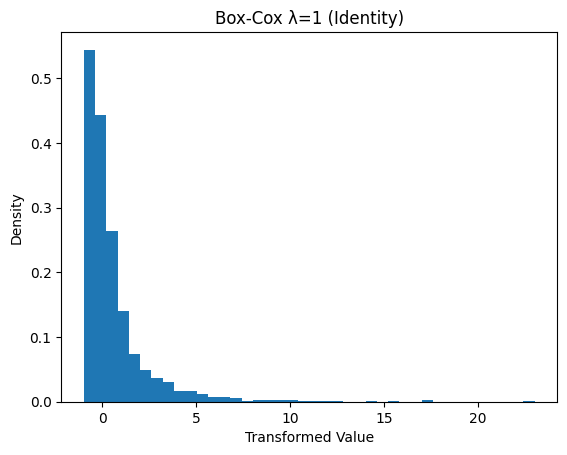

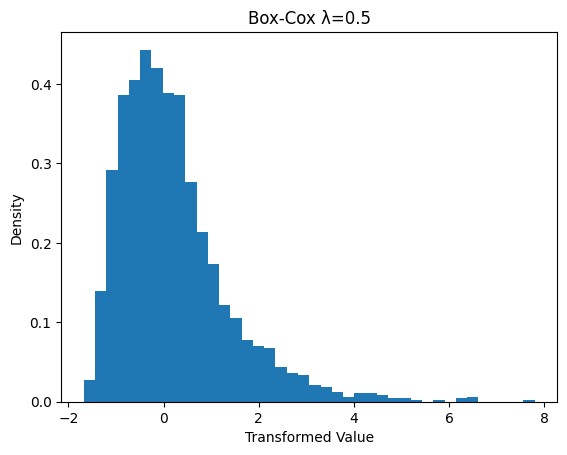

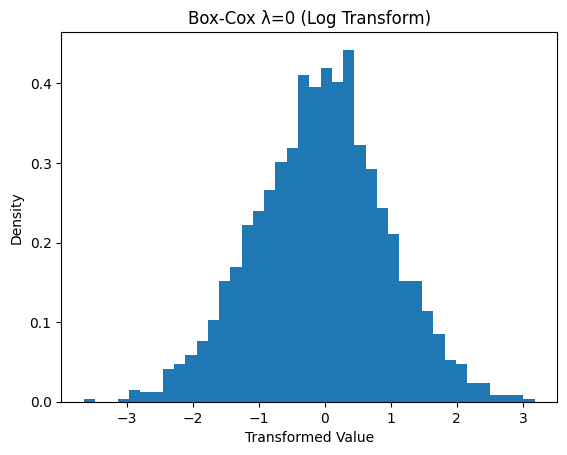

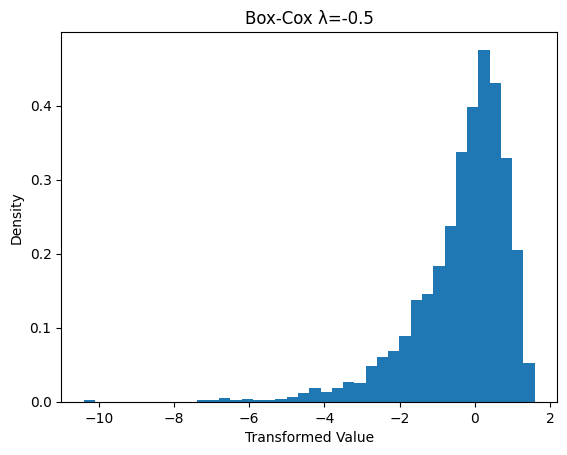

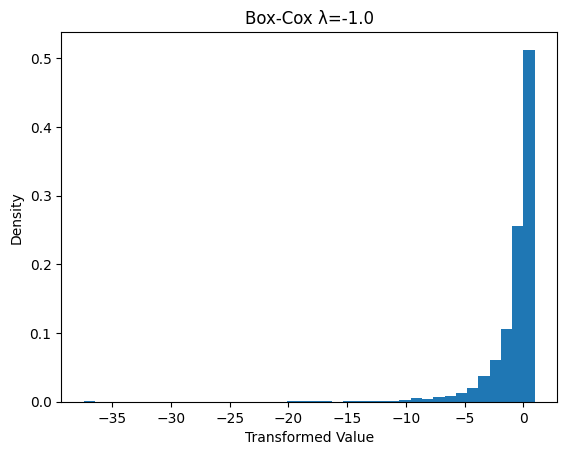

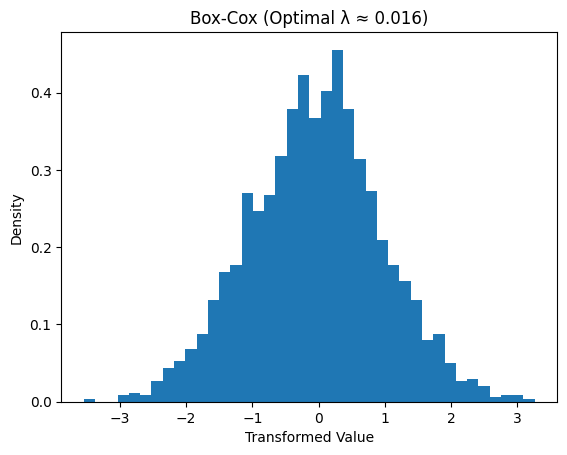

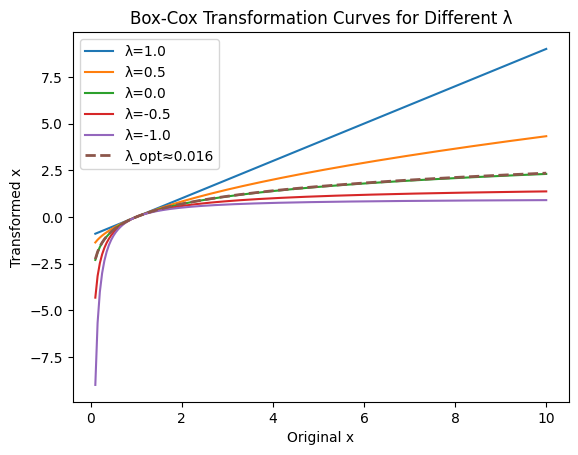

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# -----------------------------
# Box-Cox Transformation Deep Dive
# -----------------------------

# 1) Generate skewed positive data (lognormal)
rng = np.random.default_rng(42)
x_skew = rng.lognormal(mean=0.0, sigma=1.0, size=2000)

# Ensure strictly positive values (required for Box-Cox)
x_skew = np.clip(x_skew, 1e-6, None)

# 2) Try multiple λ (lambda) values for Box-Cox
lambdas = [1.0, 0.5, 0.0, -0.5, -1.0]  # identity, sqrt, log, reciprocal sqrt, reciprocal
transformed = {}

for lam in lambdas:
    if lam == 0:
        transformed[lam] = np.log(x_skew)
    else:
        transformed[lam] = (x_skew**lam - 1) / lam

# 3) Also compute the "optimal" λ from maximum likelihood
x_bc, lambda_opt = stats.boxcox(x_skew)
transformed['opt'] = x_bc

# 4) Plot histograms for each λ
for lam, data in transformed.items():
    plt.figure()
    plt.hist(data, bins=40, density=True)
    if lam == 'opt':
        title = f"Box-Cox (Optimal λ ≈ {lambda_opt:.3f})"
    elif lam == 0:
        title = "Box-Cox λ=0 (Log Transform)"
    elif lam == 1.0:
        title = "Box-Cox λ=1 (Identity)"
    else:
        title = f"Box-Cox λ={lam}"
    plt.title(title)
    plt.xlabel("Transformed Value")
    plt.ylabel("Density")
    plt.show()

# 5) Illustrate transformation curves
x_vals = np.linspace(0.1, 10, 200)
plt.figure()
for lam in lambdas:
    if lam == 0:
        y_vals = np.log(x_vals)
    else:
        y_vals = (x_vals**lam - 1) / lam
    plt.plot(x_vals, y_vals, label=f"λ={lam}")

# Also optimal λ curve
if lambda_opt != 0:
    y_opt = (x_vals**lambda_opt - 1) / lambda_opt
else:
    y_opt = np.log(x_vals)
plt.plot(x_vals, y_opt, label=f"λ_opt≈{lambda_opt:.3f}", linewidth=2, linestyle='--')

plt.title("Box-Cox Transformation Curves for Different λ")
plt.xlabel("Original x")
plt.ylabel("Transformed x")
plt.legend()
plt.show()


1. **Effect on distributions** – You can see histograms of the same skewed data transformed with:

   * λ = 1 → Identity (no change)
   * λ = 0.5 → Square root compression
   * λ = 0 → Log transform
   * λ = −0.5 → Reciprocal square root (strong compression of large values)
   * λ = −1 → Reciprocal
   * λ\_opt → The maximum likelihood λ that best normalizes the data

2. **Transformation curves** – The last plot shows how different λ values bend/compress/stretch the original scale.

   * λ > 1 stretches large values
   * 0 < λ < 1 compresses large values moderately
   * λ = 0 gives the log
   * λ < 0 flips heavy compression and can invert relationships for extreme skew


🚀 Feature Engineering Visualization Suite
This comprehensive suite demonstrates key feature engineering concepts
with mathematical foundations and practical examples.

🔍 Running Feature Engineering Demonstrations...
1. Robust vs Classical Statistics...


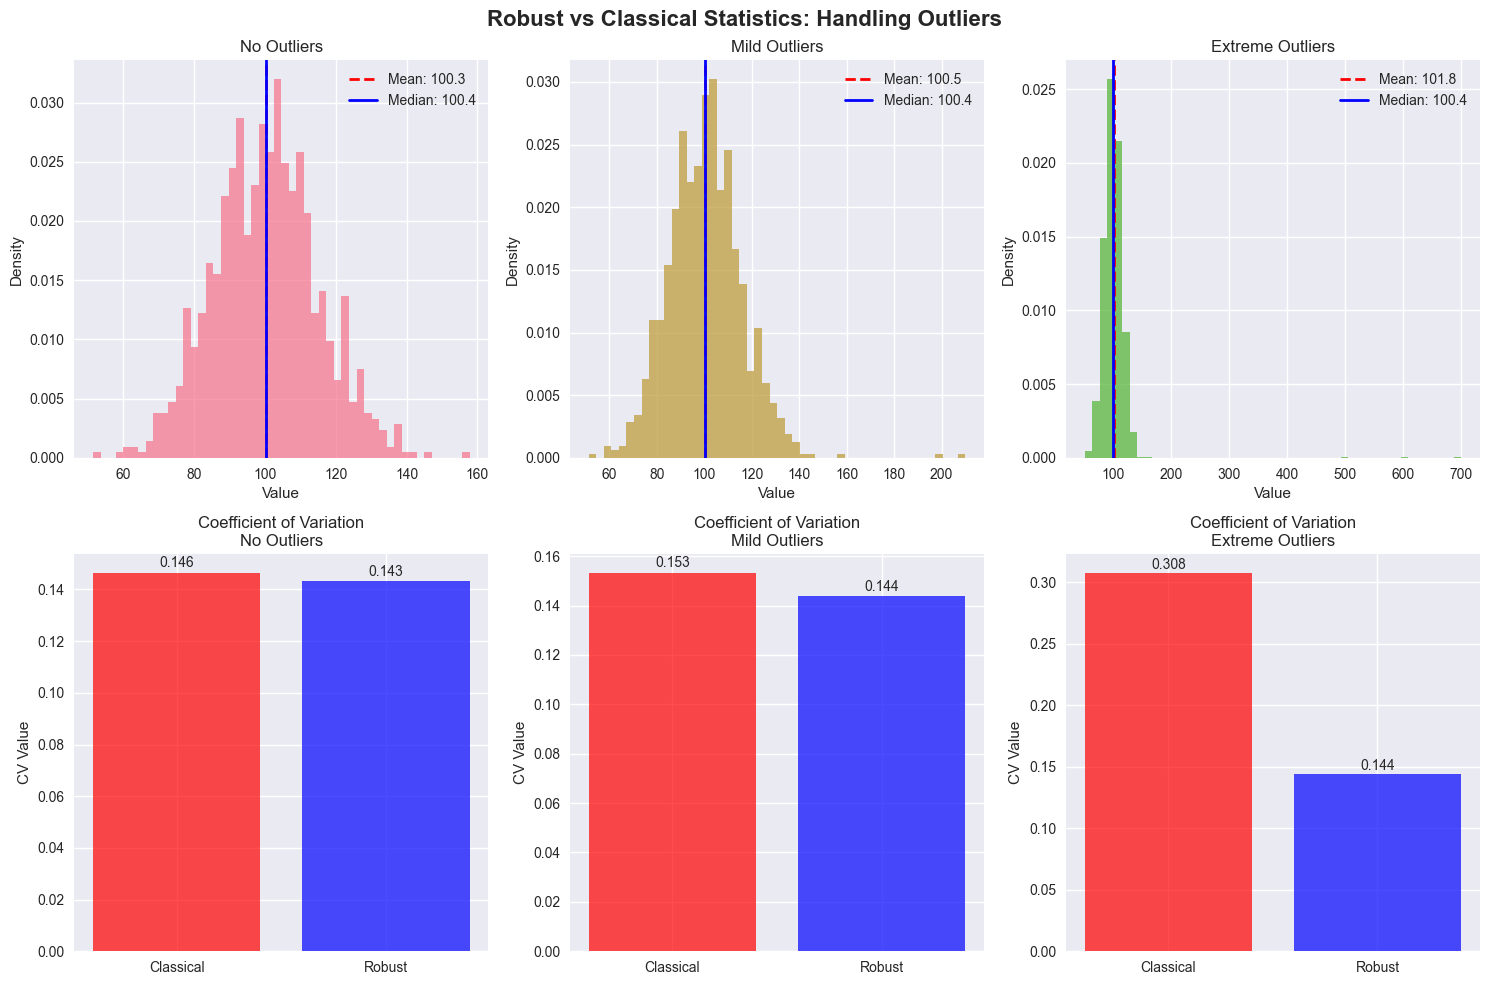


Robust Statistics Results:
           scenario     mean   median     std     mad  cv_classical  \
0       No Outliers  100.290  100.380  14.688  14.371         0.146   
1     Mild Outliers  100.499  100.397  15.402  14.428         0.153   
2  Extreme Outliers  101.785  100.403  31.312  14.446         0.308   

   cv_robust  iqr_outliers  mad_outliers  
0      0.143             8             1  
1      0.144            10             3  
2      0.144            11             4  

2. Transformation Effects...


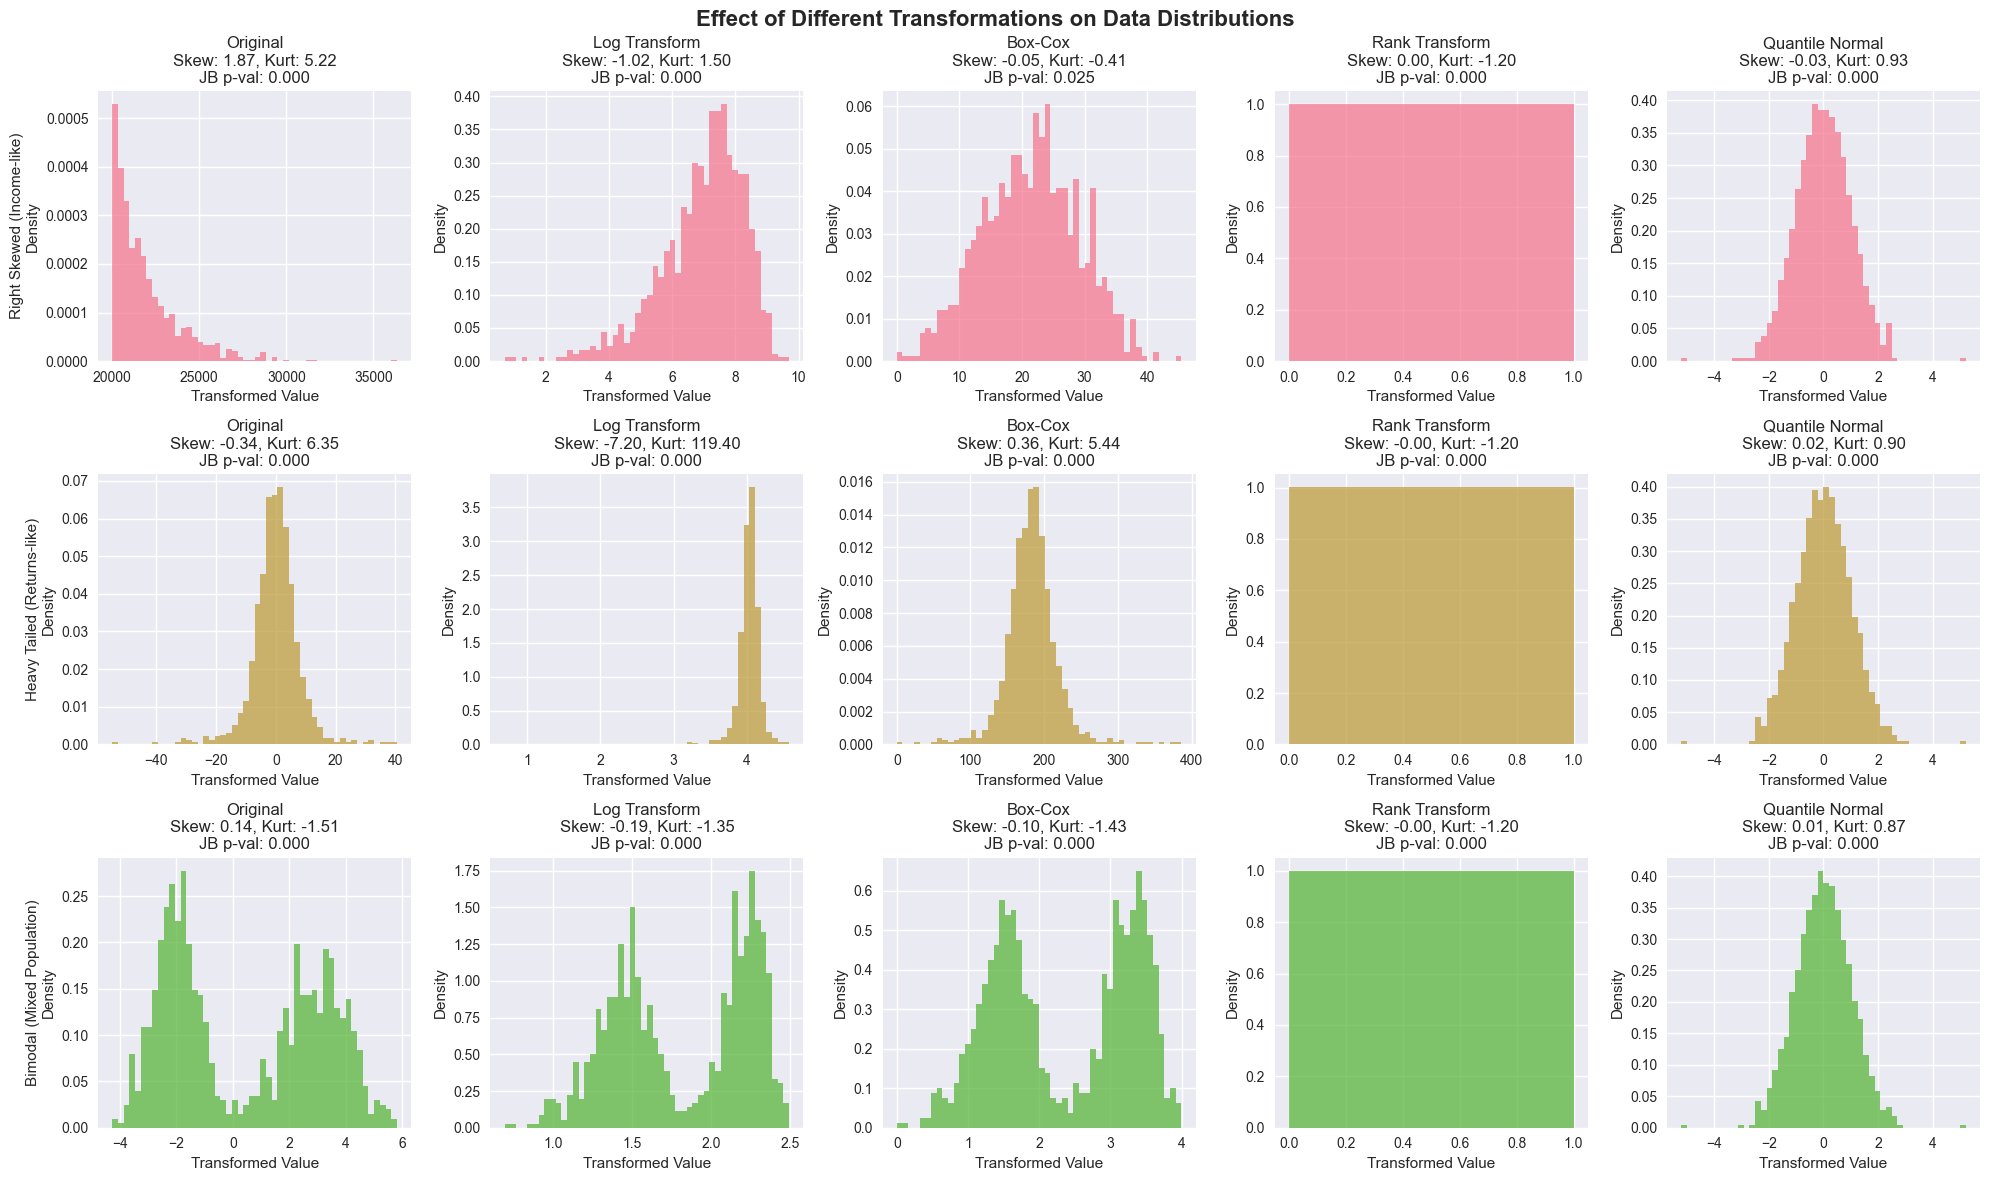

✅ Transformation visualizations complete!

3. Feature Importance Methods...


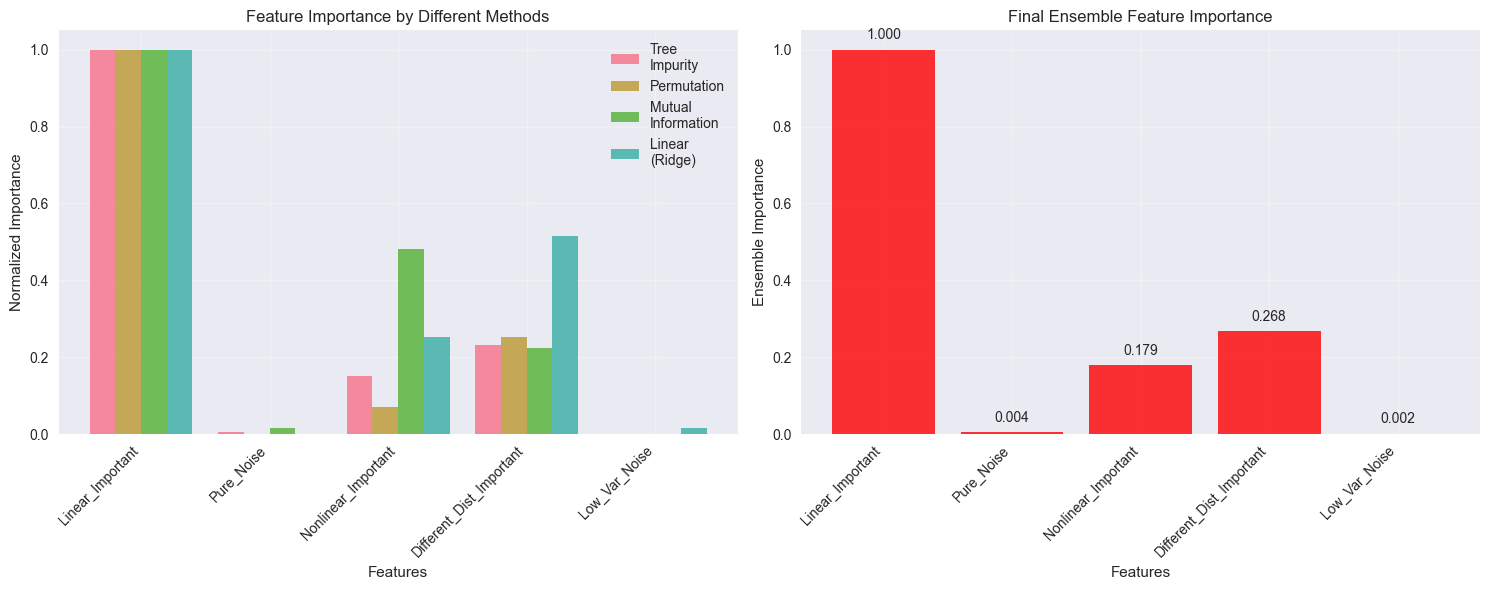


Feature Importance Results:
                    Feature  Tree_Importance  Permutation_Importance  \
0          Linear_Important            1.000                   1.000   
1                Pure_Noise            0.004                   0.001   
2       Nonlinear_Important            0.152                   0.071   
3  Different_Dist_Important            0.233                   0.252   
4             Low_Var_Noise            0.000                   0.000   

   Mutual_Information  Linear_Importance  Ensemble_Score  
0               1.000              1.000           1.000  
1               0.015              0.000           0.004  
2               0.481              0.253           0.179  
3               0.225              0.515           0.268  
4               0.000              0.015           0.002  

4. Feature Interactions...


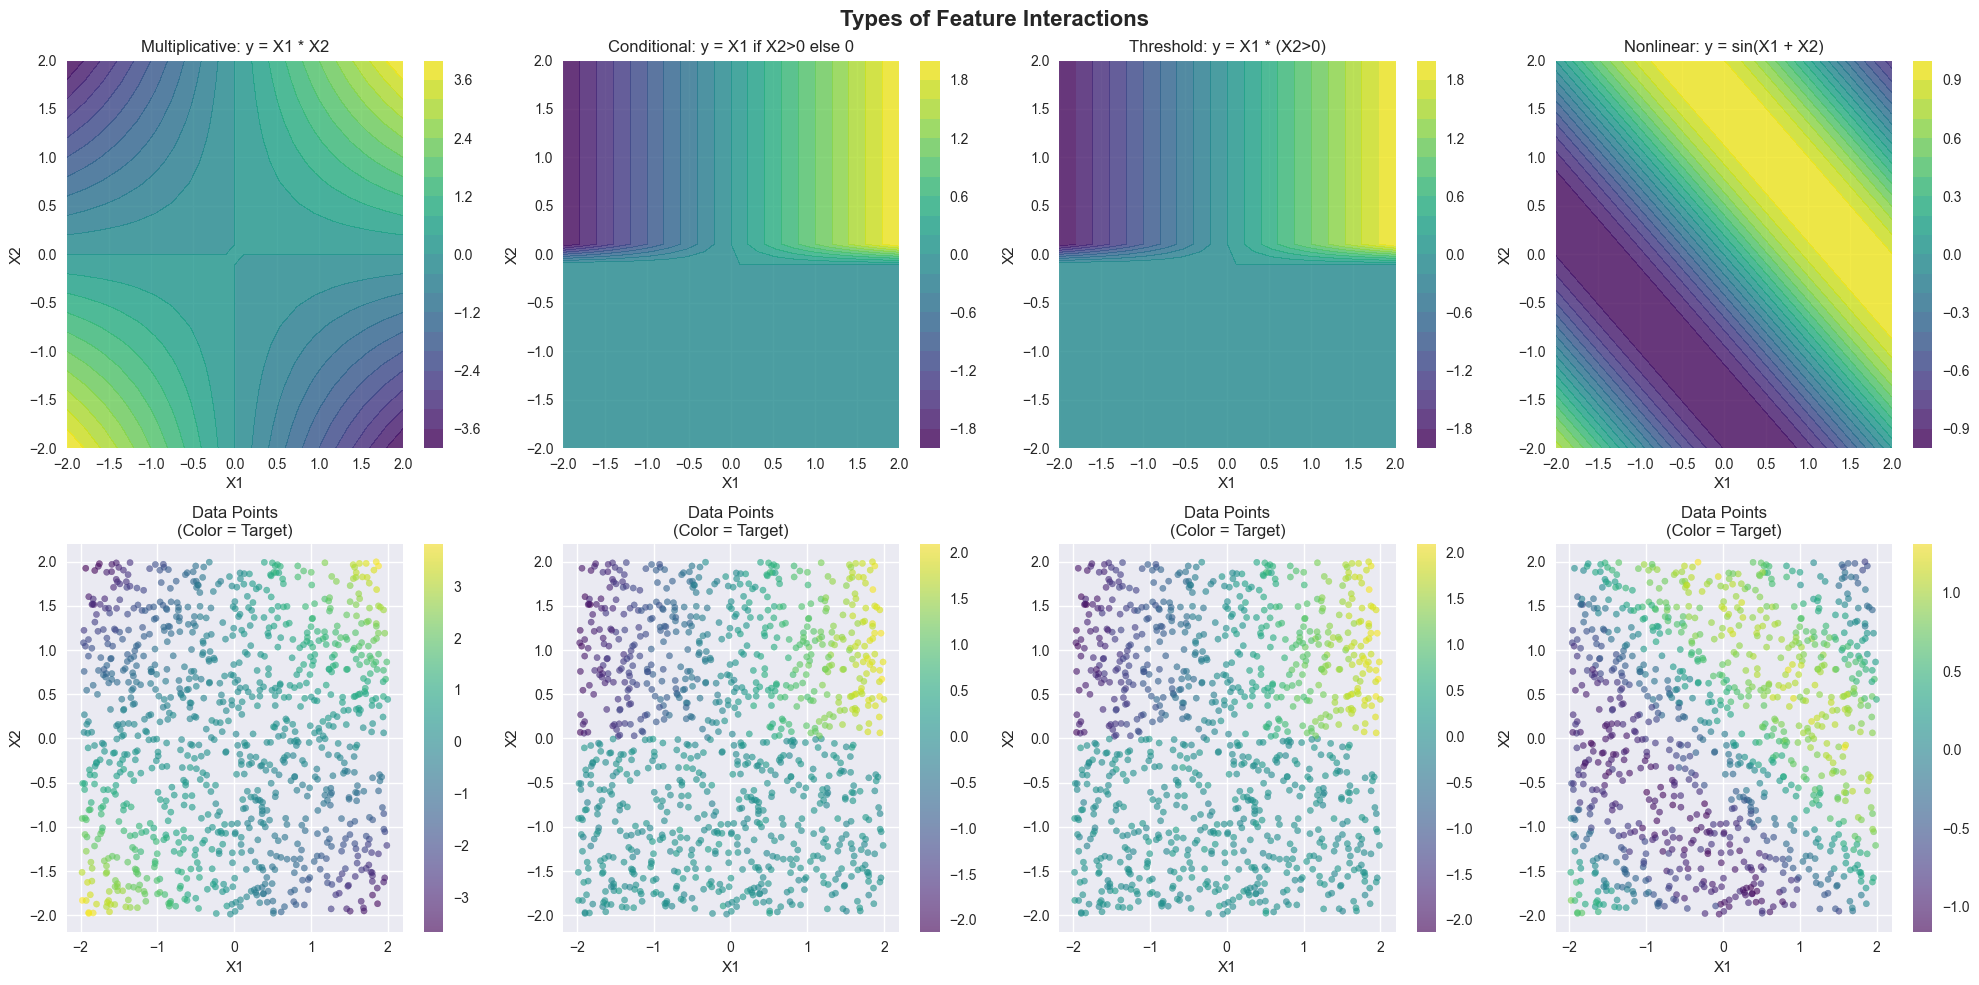

✅ Interaction visualizations complete!

5. Multicollinearity Analysis...


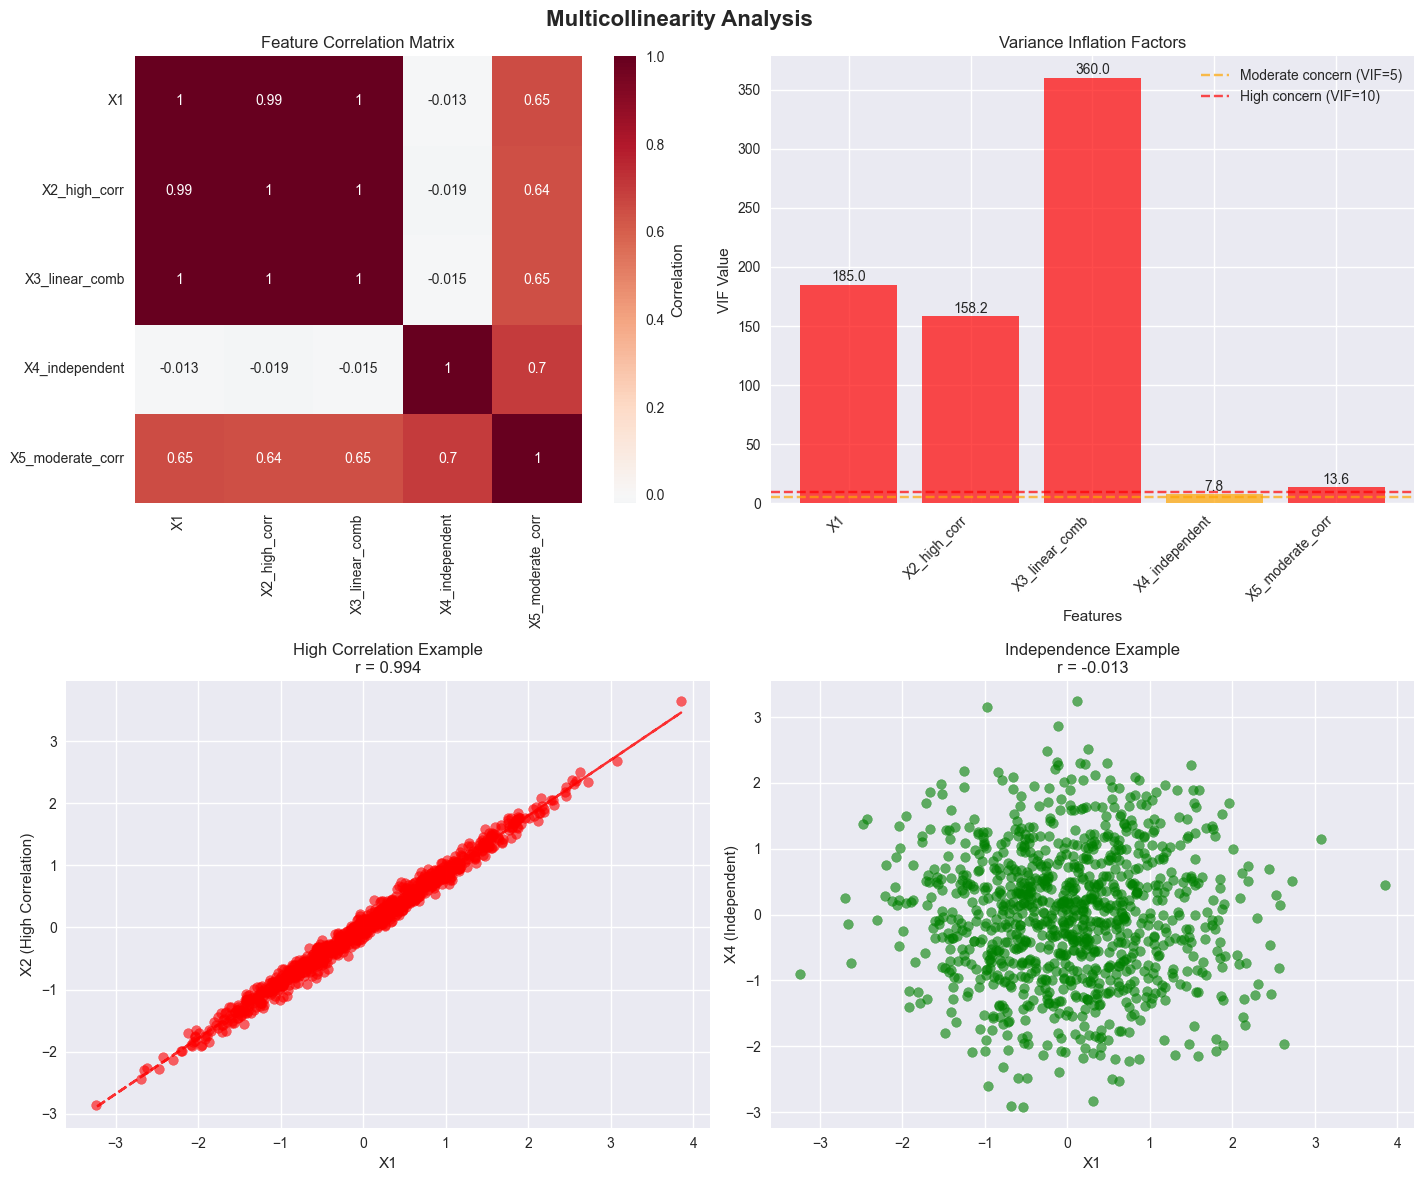


VIF Results:
            Feature      VIF
0                X1  185.037
1      X2_high_corr  158.195
2    X3_linear_comb  360.037
3    X4_independent    7.808
4  X5_moderate_corr   13.597

6. Categorical Encoding Strategies...


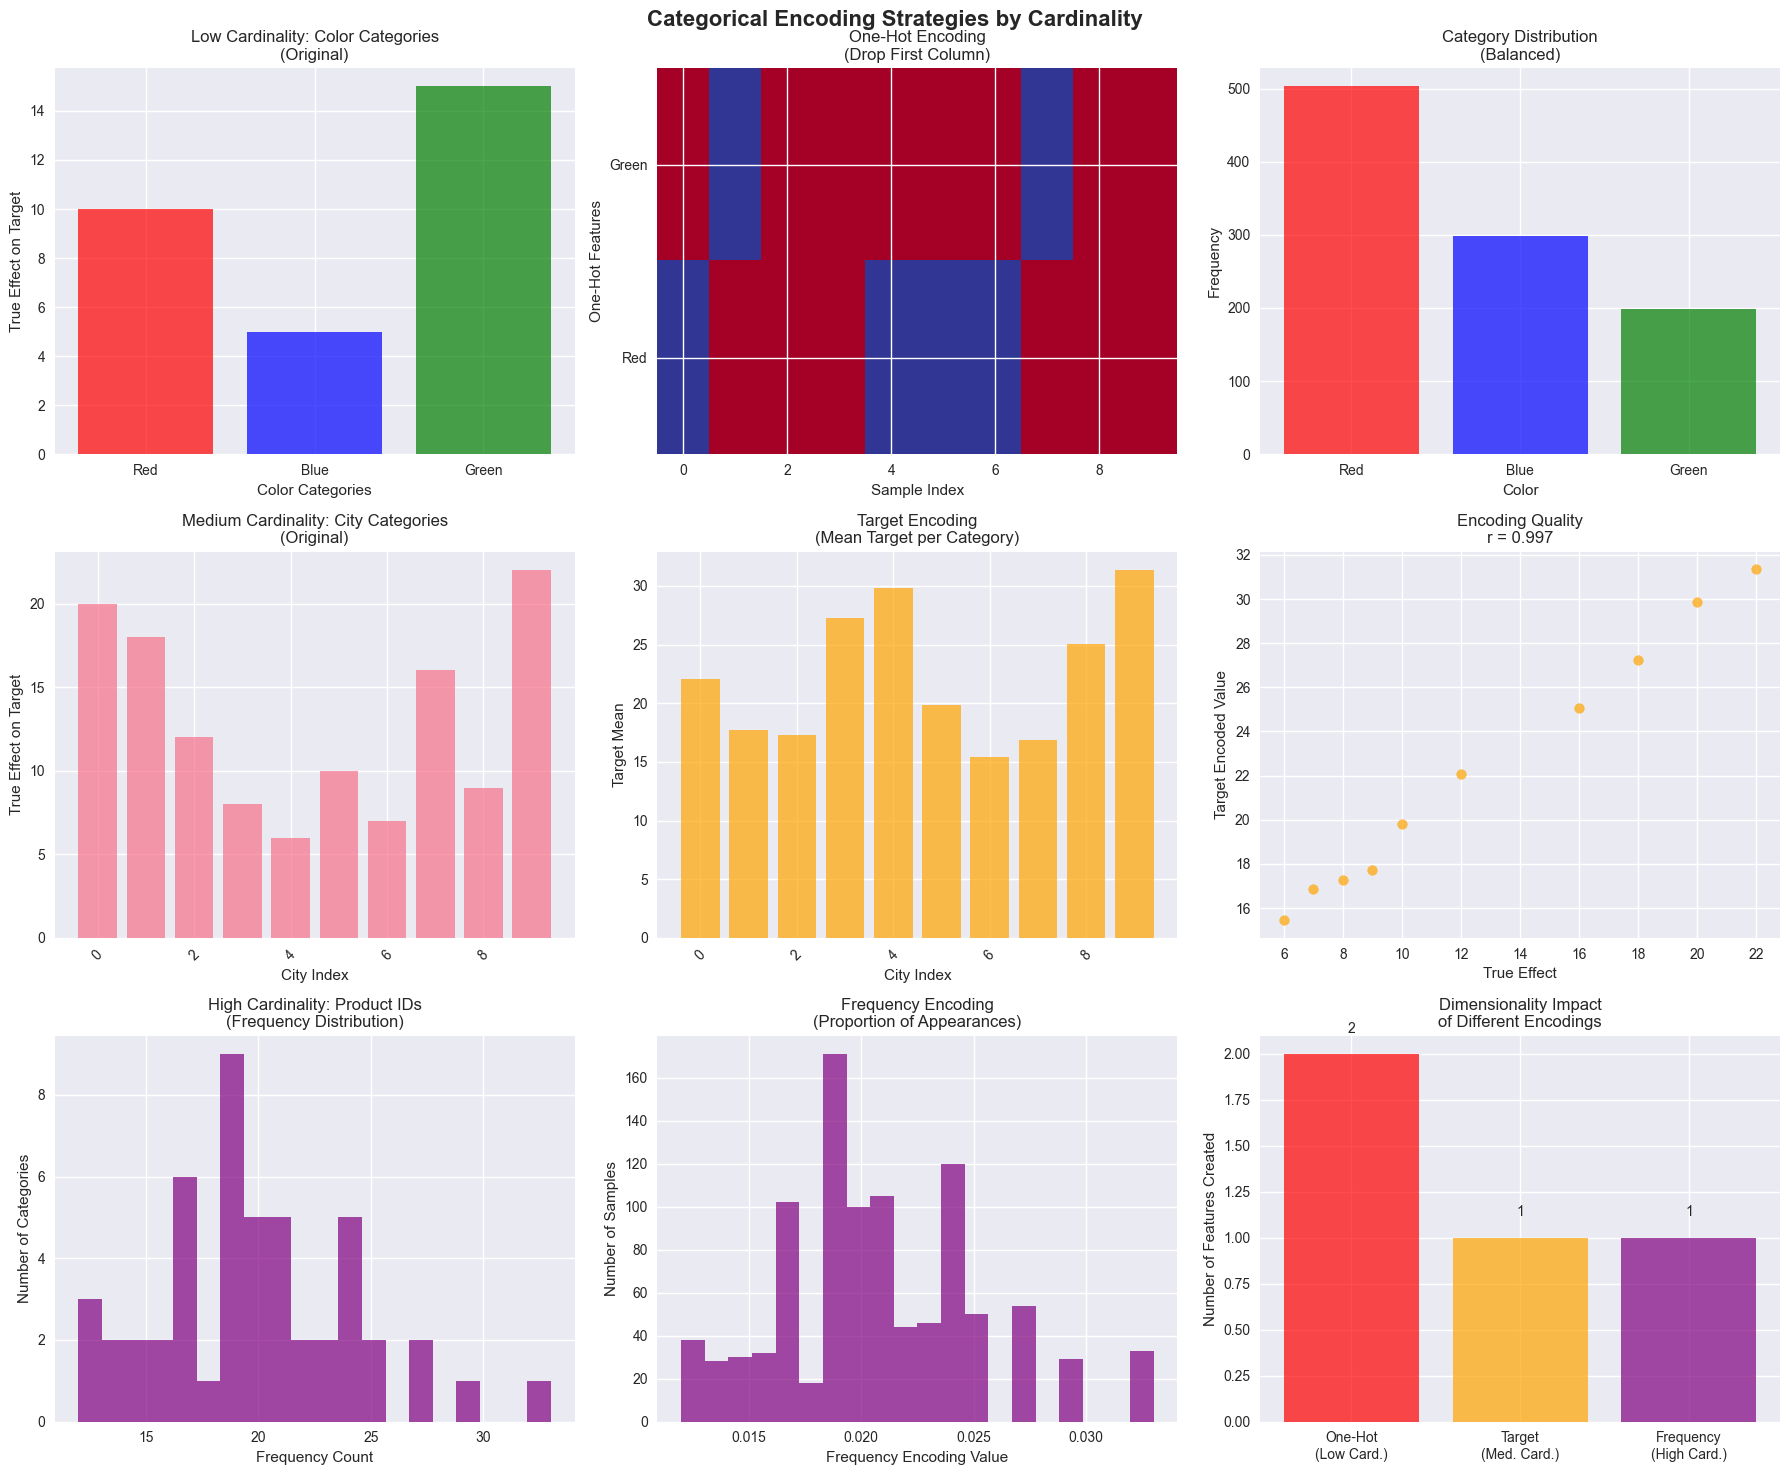

✅ Categorical encoding visualizations complete!

🎉 All Feature Engineering Demonstrations Complete!

🎯 BONUS DEMONSTRATIONS

🔄 Interactive Transformation Explorer
Exploring transformations on right-skewed data...


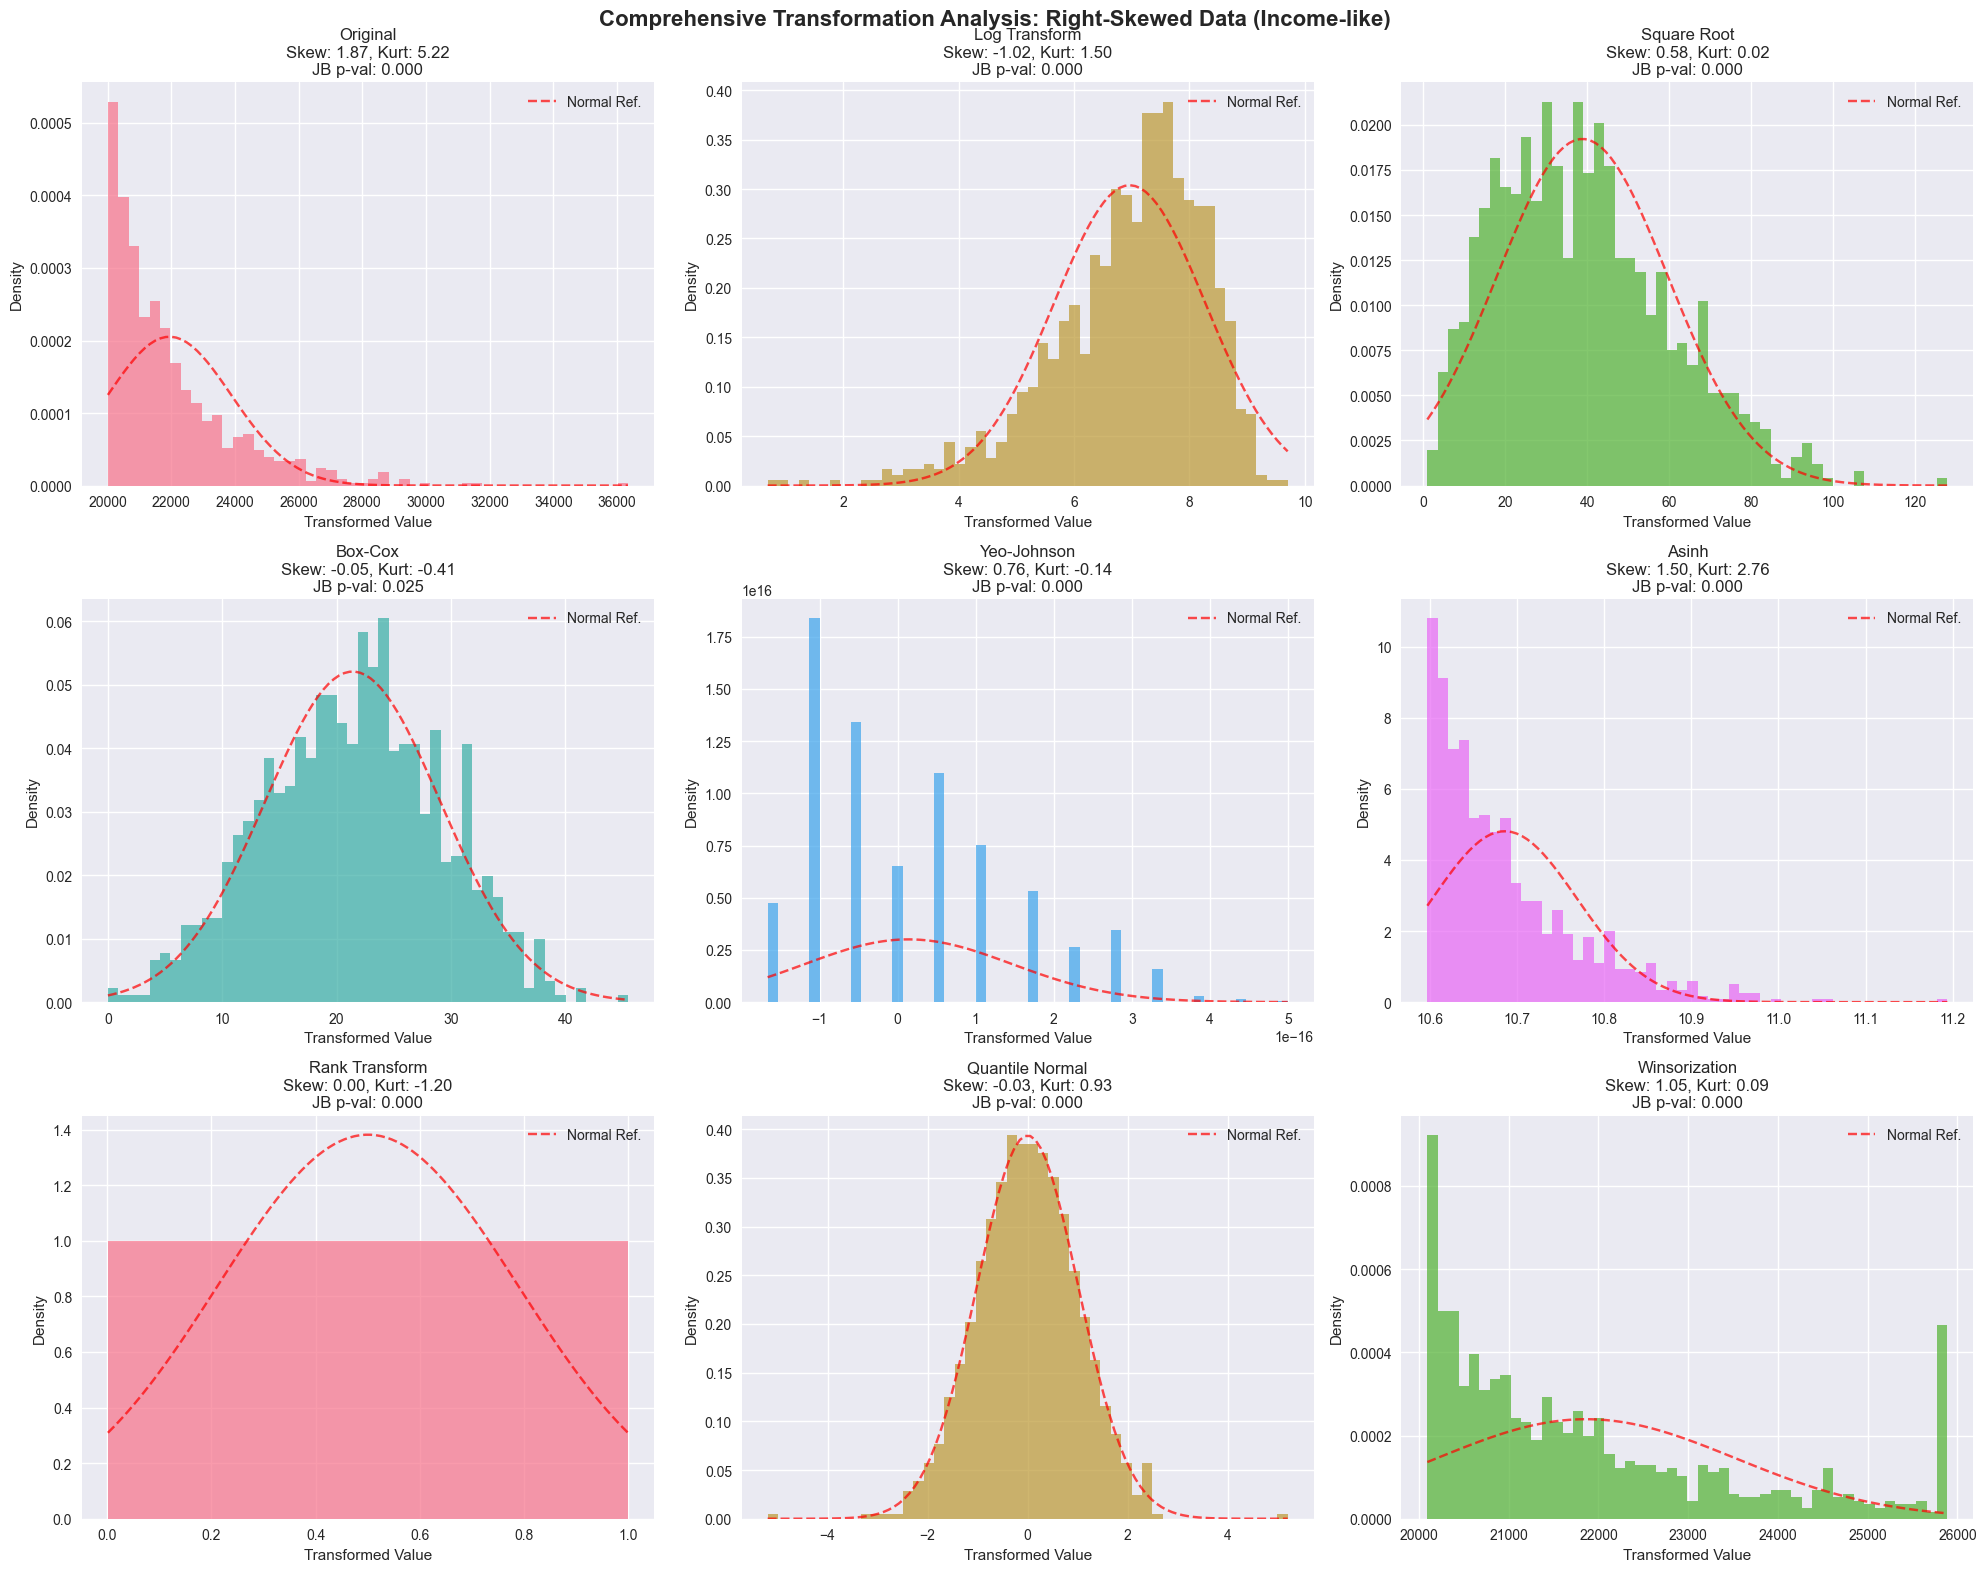


📊 Transformation Results for Right-Skewed Data (Income-like)
Ranked by Normality Score (higher = more normal):
    Transformation  Skewness  Excess_Kurtosis  JB_p_value  Normality_Score
3          Box-Cox   -0.0541          -0.4060      0.0253           0.6802
2      Square Root    0.5829           0.0157      0.0000           0.5993
4      Yeo-Johnson    0.7580          -0.1429      0.0000           0.5233
7  Quantile Normal   -0.0328           0.9270      0.0000           0.4976
8    Winsorization    1.0462           0.0917      0.0000           0.4677
6   Rank Transform    0.0000          -1.2000      0.0000           0.4545
1    Log Transform   -1.0227           1.4997      0.0000           0.2637
5            Asinh    1.4989           2.7623      0.0000           0.1773
0         Original    1.8650           5.2178      0.0000           0.1175

🏆 Best transformation: Box-Cox
Formula: f(x) = (x^λ - 1)/λ if λ≠0, log(x) if λ=0
Description: Optimal power transformation for normality


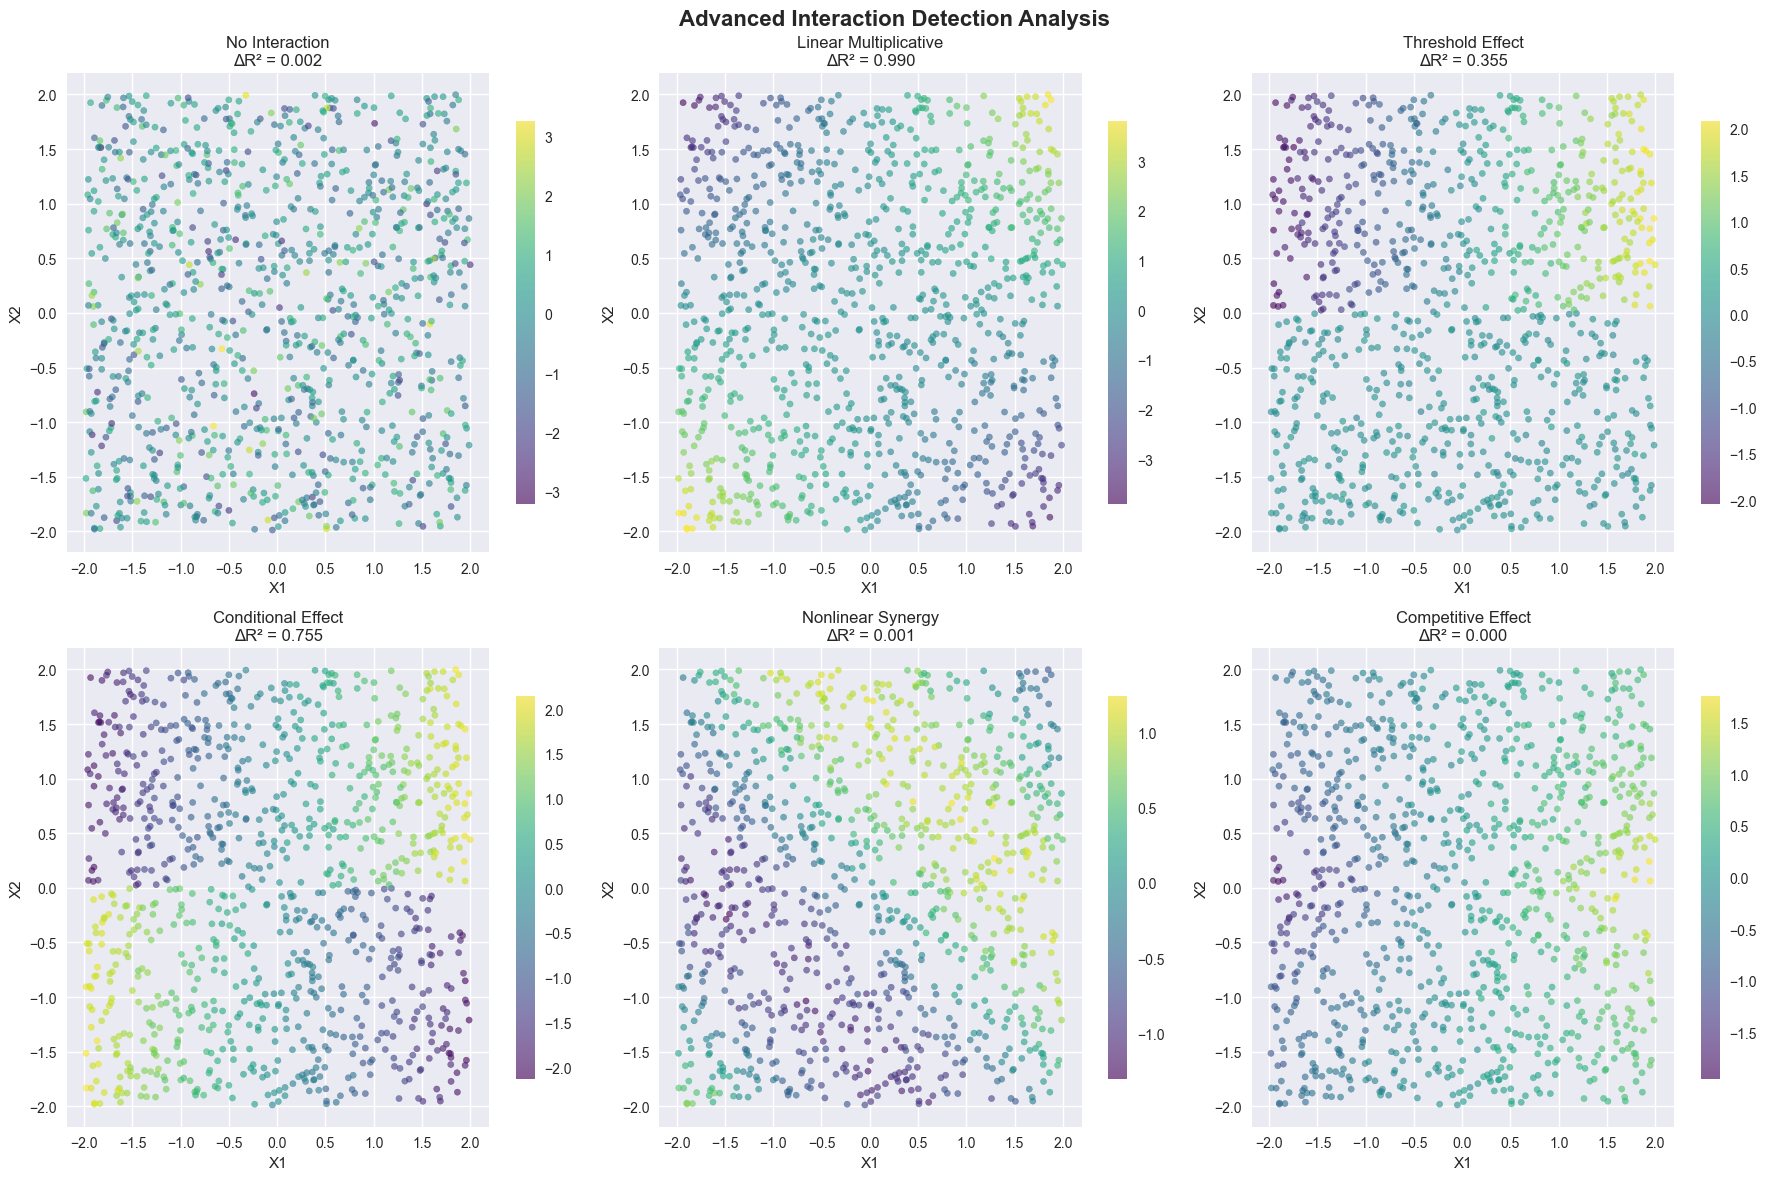

🔍 Interaction Detection Method Comparison
Methods ranked by ΔR² (interaction strength):
        interaction_type  delta_r2  pearson_interaction  spearman_interaction  \
1  Linear Multiplicative    0.9895               0.9974                0.9960   
3     Conditional Effect    0.7554               0.8714                0.9181   
2       Threshold Effect    0.3546               0.6211                0.6221   
0         No Interaction    0.0020              -0.0455               -0.0533   
4      Nonlinear Synergy    0.0007               0.0119                0.0216   
5     Competitive Effect    0.0000               0.0379                0.0547   

   mi_interaction  r2_base  r2_interaction  
1          1.5314   0.0052          0.9948  
3          0.8917   0.0046          0.7601  
2          0.4022   0.5226          0.8772  
0          0.0391   0.0002          0.0022  
4          0.3252   0.4439          0.4447  
5          0.1597   0.8868          0.8869  


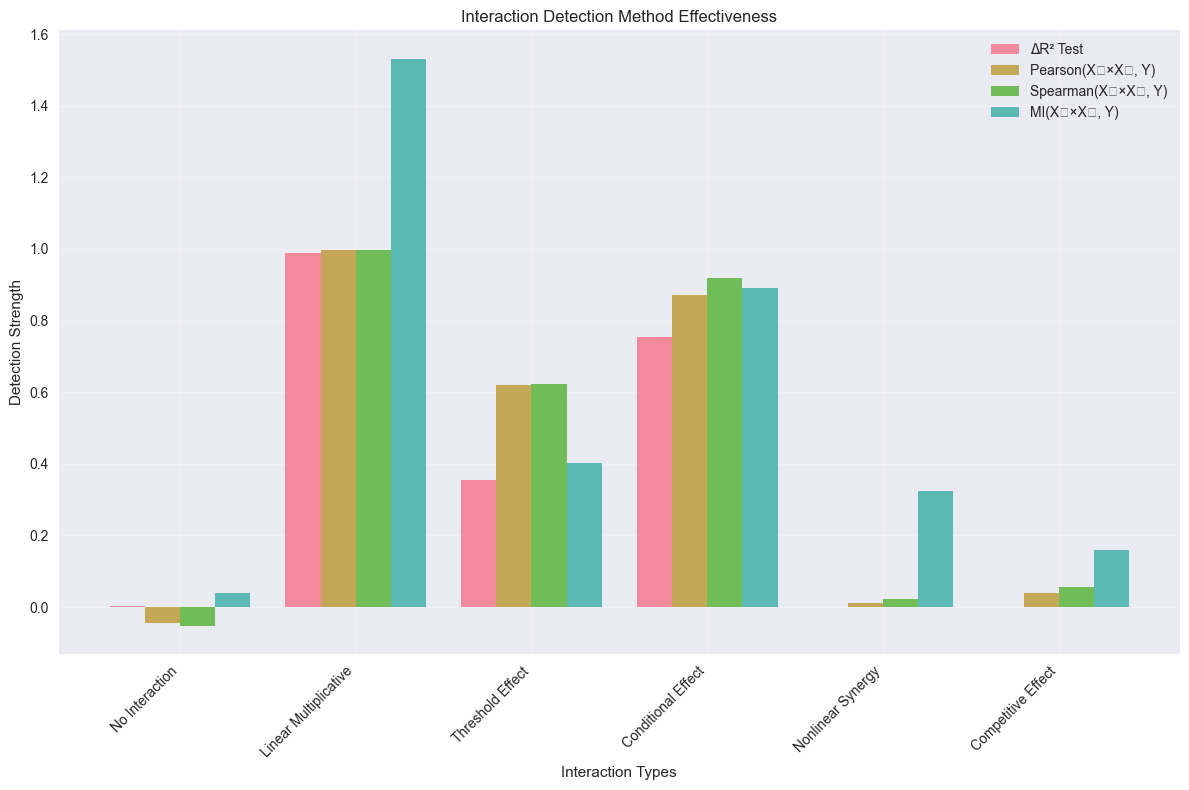


✨ All demonstrations complete!

Key takeaways:
• Robust statistics (MAD, median) handle outliers better than classical ones
• Different transformations work best for different data shapes
• Ensemble feature importance is more reliable than single methods
• Interaction detection requires multiple statistical measures
• Categorical encoding strategy depends on cardinality
• VIF helps detect problematic multicollinearity

📊 Generated 8 comprehensive visualizations!
Each plot demonstrates mathematical concepts with real examples.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import jarque_bera, skew, kurtosis
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import RidgeCV
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ==============================================================================
# PART 1: ROBUST VS CLASSICAL STATISTICS VISUALIZATION
# ==============================================================================

def demonstrate_robust_vs_classical_stats():
    """Show how robust statistics handle outliers better than classical ones."""
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Robust vs Classical Statistics: Handling Outliers', fontsize=16, fontweight='bold')
    
    # Generate data with increasing outlier severity
    np.random.seed(42)
    base_data = np.random.normal(100, 15, 1000)
    
    scenarios = [
        ("No Outliers", base_data),
        ("Mild Outliers", np.concatenate([base_data, [200, 210]])),
        ("Extreme Outliers", np.concatenate([base_data, [500, 600, 700]]))
    ]
    
    results = []
    
    for i, (scenario, data) in enumerate(scenarios):
        # Classical statistics
        mean_val = np.mean(data)
        std_val = np.std(data, ddof=1)
        cv_classical = std_val / abs(mean_val)
        
        # Robust statistics  
        median_val = np.median(data)
        mad_val = np.median(np.abs(data - median_val)) * 1.4826
        cv_robust = mad_val / abs(median_val)
        
        # IQR outliers
        q1, q3 = np.percentile(data, [25, 75])
        iqr = q3 - q1
        iqr_outliers = ((data < q1 - 1.5*iqr) | (data > q3 + 1.5*iqr)).sum()
        
        # MAD outliers  
        mad_z = np.abs(data - median_val) / mad_val
        mad_outliers = (mad_z > 3.5).sum()
        
        results.append({
            'scenario': scenario,
            'mean': mean_val, 'median': median_val,
            'std': std_val, 'mad': mad_val,
            'cv_classical': cv_classical, 'cv_robust': cv_robust,
            'iqr_outliers': iqr_outliers, 'mad_outliers': mad_outliers
        })
        
        # Plot histogram
        axes[0, i].hist(data, bins=50, alpha=0.7, density=True, color=f'C{i}')
        axes[0, i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
        axes[0, i].axvline(median_val, color='blue', linestyle='-', linewidth=2, label=f'Median: {median_val:.1f}')
        axes[0, i].set_title(f'{scenario}')
        axes[0, i].legend()
        axes[0, i].set_xlabel('Value')
        axes[0, i].set_ylabel('Density')
        
        # Plot statistics comparison
        stats_comparison = [cv_classical, cv_robust]
        outlier_comparison = [iqr_outliers, mad_outliers]
        
        x_pos = [0, 1]
        axes[1, i].bar(x_pos, stats_comparison, color=['red', 'blue'], alpha=0.7)
        axes[1, i].set_title(f'Coefficient of Variation\n{scenario}')
        axes[1, i].set_xticks(x_pos)
        axes[1, i].set_xticklabels(['Classical', 'Robust'])
        axes[1, i].set_ylabel('CV Value')
        
        # Add values on bars
        for j, v in enumerate(stats_comparison):
            axes[1, i].text(j, v + 0.001, f'{v:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    return fig, pd.DataFrame(results)

# ==============================================================================
# PART 2: TRANSFORMATION EFFECTS VISUALIZATION  
# ==============================================================================

def demonstrate_transformations():
    """Show how different transformations affect data distributions."""
    
    # Generate different types of problematic data
    np.random.seed(42)
    
    # Right-skewed data (like income)
    right_skewed = np.random.exponential(2, 1000) * 1000 + 20000
    
    # Heavy-tailed data (like stock returns)
    heavy_tailed = stats.t.rvs(df=3, size=1000) * 5
    
    # Bimodal data (like mixed populations)
    bimodal = np.concatenate([
        np.random.normal(-2, 0.8, 500),
        np.random.normal(3, 1.2, 500)
    ])
    
    datasets = [
        ("Right Skewed (Income-like)", right_skewed),
        ("Heavy Tailed (Returns-like)", heavy_tailed), 
        ("Bimodal (Mixed Population)", bimodal)
    ]
    
    transformations = [
        ("Original", lambda x: x),
        ("Log Transform", lambda x: np.log1p(x - x.min() + 1)),
        ("Box-Cox", lambda x: stats.boxcox(x - x.min() + 1)[0]),
        ("Rank Transform", lambda x: stats.rankdata(x) / (len(x) + 1e-9)),
        ("Quantile Normal", None)  # Special handling needed
    ]
    
    fig, axes = plt.subplots(len(datasets), len(transformations), figsize=(20, 12))
    fig.suptitle('Effect of Different Transformations on Data Distributions', fontsize=16, fontweight='bold')
    
    for i, (data_name, data) in enumerate(datasets):
        for j, (trans_name, trans_func) in enumerate(transformations):
            
            if trans_name == "Quantile Normal":
                # Use QuantileTransformer for this
                qt = QuantileTransformer(output_distribution='normal', n_quantiles=100, random_state=42)
                transformed = qt.fit_transform(data.reshape(-1, 1)).ravel()
            else:
                try:
                    transformed = trans_func(data)
                except:
                    # Handle edge cases
                    transformed = data
            
            # Calculate statistics
            skew_val = skew(transformed)
            kurt_val = kurtosis(transformed, fisher=True)  # Excess kurtosis
            try:
                jb_stat, jb_pval = jarque_bera(transformed)
            except:
                jb_pval = np.nan
            
            # Plot
            axes[i, j].hist(transformed, bins=50, alpha=0.7, density=True, color=f'C{i}')
            axes[i, j].set_title(f'{trans_name}\nSkew: {skew_val:.2f}, Kurt: {kurt_val:.2f}\nJB p-val: {jb_pval:.3f}')
            
            if j == 0:  # Add data name to leftmost plots
                axes[i, j].set_ylabel(f'{data_name}\nDensity')
            else:
                axes[i, j].set_ylabel('Density')
                
            axes[i, j].set_xlabel('Transformed Value')
    
    plt.tight_layout()
    return fig

# ==============================================================================
# PART 3: FEATURE IMPORTANCE COMPARISON
# ==============================================================================

def demonstrate_feature_importance():
    """Compare different feature importance methods on synthetic data."""
    
    np.random.seed(42)
    n_samples = 1000
    
    # Create synthetic features with known importance
    X1 = np.random.normal(0, 1, n_samples)  # Important linear feature
    X2 = np.random.normal(0, 1, n_samples)  # Noise feature
    X3 = X1**2  # Important nonlinear feature  
    X4 = np.random.exponential(1, n_samples)  # Important with different distribution
    X5 = np.random.normal(0, 0.1, n_samples)  # Low-variance noise
    
    # Create target with known relationships
    y = 2*X1 + 0.5*X3 + X4 + np.random.normal(0, 0.5, n_samples)
    
    X = pd.DataFrame({
        'Linear_Important': X1,
        'Pure_Noise': X2, 
        'Nonlinear_Important': X3,
        'Different_Dist_Important': X4,
        'Low_Var_Noise': X5
    })
    
    # Calculate different importance measures
    
    # 1. Tree-based importance (Random Forest)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    tree_importance = rf.feature_importances_
    
    # 2. Permutation importance
    perm_importance = permutation_importance(rf, X, y, n_repeats=10, random_state=42)
    perm_scores = perm_importance.importances_mean
    
    # 3. Mutual information
    mi_scores = mutual_info_regression(X, y, random_state=42)
    
    # 4. Linear importance (Ridge regression coefficients)
    ridge = RidgeCV(alphas=[0.1, 1.0, 10.0])
    ridge.fit(X, y)
    linear_importance = np.abs(ridge.coef_)
    
    # Normalize all scores to [0, 1] for comparison
    def normalize_scores(scores):
        scores = np.array(scores)
        return (scores - scores.min()) / (scores.max() - scores.min() + 1e-12)
    
    tree_norm = normalize_scores(tree_importance)
    perm_norm = normalize_scores(perm_scores)
    mi_norm = normalize_scores(mi_scores)
    linear_norm = normalize_scores(linear_importance)
    
    # Create ensemble score (weighted average)
    ensemble_score = 0.35*tree_norm + 0.40*perm_norm + 0.15*mi_norm + 0.10*linear_norm
    
    # Create comparison plot
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Individual importance scores
    methods = ['Tree\nImpurity', 'Permutation', 'Mutual\nInformation', 'Linear\n(Ridge)']
    scores_matrix = np.array([tree_norm, perm_norm, mi_norm, linear_norm])
    
    x_pos = np.arange(len(X.columns))
    width = 0.2
    
    for i, (method, scores) in enumerate(zip(methods, scores_matrix)):
        axes[0].bar(x_pos + i*width, scores, width, label=method, alpha=0.8)
    
    axes[0].set_xlabel('Features')
    axes[0].set_ylabel('Normalized Importance')
    axes[0].set_title('Feature Importance by Different Methods')
    axes[0].set_xticks(x_pos + width*1.5)
    axes[0].set_xticklabels(X.columns, rotation=45, ha='right')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Ensemble vs individual methods
    axes[1].bar(x_pos, ensemble_score, alpha=0.8, color='red', label='Ensemble Score')
    axes[1].set_xlabel('Features')  
    axes[1].set_ylabel('Ensemble Importance')
    axes[1].set_title('Final Ensemble Feature Importance')
    axes[1].set_xticks(x_pos)
    axes[1].set_xticklabels(X.columns, rotation=45, ha='right')
    axes[1].grid(True, alpha=0.3)
    
    # Add values on bars
    for i, v in enumerate(ensemble_score):
        axes[1].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    
    # Create results dataframe
    results_df = pd.DataFrame({
        'Feature': X.columns,
        'Tree_Importance': tree_norm,
        'Permutation_Importance': perm_norm, 
        'Mutual_Information': mi_norm,
        'Linear_Importance': linear_norm,
        'Ensemble_Score': ensemble_score
    })
    
    return fig, results_df

# ==============================================================================
# PART 4: INTERACTION EFFECTS VISUALIZATION
# ==============================================================================

def demonstrate_interactions():
    """Show examples of feature interactions and how to detect them."""
    
    np.random.seed(42)
    n_samples = 1000
    
    # Create features
    X1 = np.random.uniform(-2, 2, n_samples)
    X2 = np.random.uniform(-2, 2, n_samples)
    noise = np.random.normal(0, 0.1, n_samples)
    
    # Different types of interactions
    scenarios = [
        ("Multiplicative: y = X1 * X2", X1 * X2 + noise),
        ("Conditional: y = X1 if X2>0 else 0", np.where(X2 > 0, X1, 0) + noise),
        ("Threshold: y = X1 * (X2>0)", X1 * (X2 > 0) + noise),
        ("Nonlinear: y = sin(X1 + X2)", np.sin(X1 + X2) + noise)
    ]
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle('Types of Feature Interactions', fontsize=16, fontweight='bold')
    
    for i, (title, y) in enumerate(scenarios):
        
        # 3D surface plot showing interaction
        ax1 = axes[0, i]
        
        # Create grid for surface
        x1_grid = np.linspace(-2, 2, 20)
        x2_grid = np.linspace(-2, 2, 20)
        X1_mesh, X2_mesh = np.meshgrid(x1_grid, x2_grid)
        
        if "Multiplicative" in title:
            Y_mesh = X1_mesh * X2_mesh
        elif "Conditional" in title:
            Y_mesh = np.where(X2_mesh > 0, X1_mesh, 0)
        elif "Threshold" in title:
            Y_mesh = X1_mesh * (X2_mesh > 0)
        elif "Nonlinear" in title:
            Y_mesh = np.sin(X1_mesh + X2_mesh)
            
        contour = ax1.contourf(X1_mesh, X2_mesh, Y_mesh, levels=20, cmap='viridis', alpha=0.8)
        ax1.set_xlabel('X1')
        ax1.set_ylabel('X2')
        ax1.set_title(title)
        plt.colorbar(contour, ax=ax1)
        
        # Scatter plot showing actual data points
        ax2 = axes[1, i]
        scatter = ax2.scatter(X1, X2, c=y, cmap='viridis', alpha=0.6, s=20)
        ax2.set_xlabel('X1')
        ax2.set_ylabel('X2')
        ax2.set_title(f'Data Points\n(Color = Target)')
        plt.colorbar(scatter, ax=ax2)
    
    plt.tight_layout()
    return fig

# ==============================================================================
# PART 5: MULTICOLLINEARITY VISUALIZATION
# ==============================================================================

def demonstrate_multicollinearity():
    """Show the effects of multicollinearity and VIF calculation."""
    
    np.random.seed(42)
    n_samples = 1000
    
    # Create features with varying degrees of collinearity
    X1 = np.random.normal(0, 1, n_samples)
    X2 = 0.9*X1 + 0.1*np.random.normal(0, 1, n_samples)  # High correlation with X1
    X3 = X1 + X2 + 0.1*np.random.normal(0, 1, n_samples)  # Linear combination
    X4 = np.random.normal(0, 1, n_samples)  # Independent
    X5 = 0.5*X1 + 0.5*X4 + 0.2*np.random.normal(0, 1, n_samples)  # Moderate correlation
    
    X = pd.DataFrame({
        'X1': X1, 'X2_high_corr': X2, 'X3_linear_comb': X3, 
        'X4_independent': X4, 'X5_moderate_corr': X5
    })
    
    # Calculate VIF for each feature
    def calculate_vif(df):
        vif_data = pd.DataFrame()
        vif_data["Feature"] = df.columns
        vif_data["VIF"] = [1/(1 - r2) if r2 < 0.999 else np.inf 
                          for r2 in [calculate_r2(df, col) for col in df.columns]]
        return vif_data
    
    def calculate_r2(df, target_col):
        X_others = df.drop(columns=[target_col])
        y_target = df[target_col]
        
        # Simple linear regression R²
        if len(X_others.columns) == 0:
            return 0
        
        from sklearn.linear_model import LinearRegression
        lr = LinearRegression()
        lr.fit(X_others, y_target)
        return lr.score(X_others, y_target)
    
    vif_results = calculate_vif(X)
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Multicollinearity Analysis', fontsize=16, fontweight='bold')
    
    # Plot 1: Correlation matrix heatmap
    corr_matrix = X.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
                square=True, ax=axes[0,0], cbar_kws={'label': 'Correlation'})
    axes[0,0].set_title('Feature Correlation Matrix')
    
    # Plot 2: VIF values
    colors = ['green' if vif < 5 else 'orange' if vif < 10 else 'red' for vif in vif_results['VIF']]
    bars = axes[0,1].bar(range(len(vif_results)), vif_results['VIF'], color=colors, alpha=0.7)
    axes[0,1].set_xlabel('Features')
    axes[0,1].set_ylabel('VIF Value')
    axes[0,1].set_title('Variance Inflation Factors')
    axes[0,1].set_xticks(range(len(vif_results)))
    axes[0,1].set_xticklabels(vif_results['Feature'], rotation=45, ha='right')
    axes[0,1].axhline(y=5, color='orange', linestyle='--', alpha=0.7, label='Moderate concern (VIF=5)')
    axes[0,1].axhline(y=10, color='red', linestyle='--', alpha=0.7, label='High concern (VIF=10)')
    axes[0,1].legend()
    
    # Add VIF values on bars
    for i, (bar, vif) in enumerate(zip(bars, vif_results['VIF'])):
        height = bar.get_height()
        if np.isfinite(height):
            axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                         f'{height:.1f}', ha='center', va='bottom')
    
    # Plot 3: Scatter plot showing high correlation example
    axes[1,0].scatter(X['X1'], X['X2_high_corr'], alpha=0.6, color='red')
    axes[1,0].set_xlabel('X1')
    axes[1,0].set_ylabel('X2 (High Correlation)')
    axes[1,0].set_title(f'High Correlation Example\nr = {corr_matrix.loc["X1", "X2_high_corr"]:.3f}')
    
    # Add regression line
    z = np.polyfit(X['X1'], X['X2_high_corr'], 1)
    p = np.poly1d(z)
    axes[1,0].plot(X['X1'], p(X['X1']), "r--", alpha=0.8)
    
    # Plot 4: Scatter plot showing independence example  
    axes[1,1].scatter(X['X1'], X['X4_independent'], alpha=0.6, color='green')
    axes[1,1].set_xlabel('X1')
    axes[1,1].set_ylabel('X4 (Independent)')
    axes[1,1].set_title(f'Independence Example\nr = {corr_matrix.loc["X1", "X4_independent"]:.3f}')
    
    plt.tight_layout()
    
    return fig, vif_results

# ==============================================================================
# PART 6: CATEGORICAL ENCODING COMPARISON
# ==============================================================================

def demonstrate_categorical_encoding():
    """Show different categorical encoding strategies and their effects."""
    
    np.random.seed(42)
    n_samples = 1000
    
    # Create synthetic categorical data with different cardinalities
    
    # Low cardinality (2-5 categories)
    colors = np.random.choice(['Red', 'Blue', 'Green'], n_samples, p=[0.5, 0.3, 0.2])
    
    # Medium cardinality (6-20 categories)  
    cities = np.random.choice(['NYC', 'LA', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 
                              'San Antonio', 'San Diego', 'Dallas', 'San Jose'], n_samples)
    
    # High cardinality (20+ categories)
    product_ids = np.random.choice([f'PROD_{i:03d}' for i in range(50)], n_samples)
    
    # Create target variable that depends on categories
    color_effect = {'Red': 10, 'Blue': 5, 'Green': 15}
    city_effect = {'NYC': 20, 'LA': 18, 'Chicago': 12, 'Houston': 8, 'Phoenix': 6,
                   'Philadelphia': 10, 'San Antonio': 7, 'San Diego': 16, 'Dallas': 9, 'San Jose': 22}
    
    # Create target based on color and city effects plus noise
    color_effects = np.array([color_effect[c] for c in colors])
    city_effects = np.array([city_effect[c] for c in cities])
    noise = np.random.normal(0, 3, n_samples)
    
    y = color_effects + city_effects + noise
    
    # Create encoding examples
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    fig.suptitle('Categorical Encoding Strategies by Cardinality', fontsize=16, fontweight='bold')
    
    # Low cardinality: One-hot encoding
    color_dummies = pd.get_dummies(colors, drop_first=True)
    
    axes[0,0].bar(range(len(color_effect)), list(color_effect.values()), color=['red', 'blue', 'green'], alpha=0.7)
    axes[0,0].set_xlabel('Color Categories')
    axes[0,0].set_ylabel('True Effect on Target')
    axes[0,0].set_title('Low Cardinality: Color Categories\n(Original)')
    axes[0,0].set_xticks(range(len(color_effect)))
    axes[0,0].set_xticklabels(list(color_effect.keys()))
    
    # Show one-hot encoding result
    axes[0,1].imshow(color_dummies.head(10).T, cmap='RdYlBu', aspect='auto')
    axes[0,1].set_xlabel('Sample Index')
    axes[0,1].set_ylabel('One-Hot Features')
    axes[0,1].set_title('One-Hot Encoding\n(Drop First Column)')
    axes[0,1].set_yticks(range(len(color_dummies.columns)))
    axes[0,1].set_yticklabels(color_dummies.columns)
    
    # Show encoding effectiveness
    color_counts = pd.Series(colors).value_counts()
    axes[0,2].bar(color_counts.index, color_counts.values, color=['red', 'blue', 'green'], alpha=0.7)
    axes[0,2].set_xlabel('Color')
    axes[0,2].set_ylabel('Frequency')
    axes[0,2].set_title('Category Distribution\n(Balanced)')
    
    # Medium cardinality: Target encoding
    city_target_df = pd.DataFrame({'city': cities, 'target': y})
    city_target_means = city_target_df.groupby('city')['target'].mean()
    
    axes[1,0].bar(range(len(city_effect)), list(city_effect.values()), alpha=0.7)
    axes[1,0].set_xlabel('City Index')  
    axes[1,0].set_ylabel('True Effect on Target')
    axes[1,0].set_title('Medium Cardinality: City Categories\n(Original)')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Target encoding
    axes[1,1].bar(range(len(city_target_means)), city_target_means.values, alpha=0.7, color='orange')
    axes[1,1].set_xlabel('City Index')
    axes[1,1].set_ylabel('Target Mean')
    axes[1,1].set_title('Target Encoding\n(Mean Target per Category)')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    # Correlation between true and encoded
    true_city_effects = [city_effect[c] for c in city_target_means.index]
    correlation = np.corrcoef(true_city_effects, city_target_means.values)[0,1]
    axes[1,2].scatter(true_city_effects, city_target_means.values, alpha=0.7, color='orange')
    axes[1,2].set_xlabel('True Effect')
    axes[1,2].set_ylabel('Target Encoded Value')
    axes[1,2].set_title(f'Encoding Quality\nr = {correlation:.3f}')
    
    # High cardinality: Frequency encoding
    product_counts = pd.Series(product_ids).value_counts()
    product_freq_encoding = pd.Series(product_ids).map(product_counts) / len(product_ids)
    
    axes[2,0].hist(product_counts.values, bins=20, alpha=0.7, color='purple')
    axes[2,0].set_xlabel('Frequency Count')
    axes[2,0].set_ylabel('Number of Categories')
    axes[2,0].set_title('High Cardinality: Product IDs\n(Frequency Distribution)')
    
    # Frequency encoding distribution
    axes[2,1].hist(product_freq_encoding.values, bins=20, alpha=0.7, color='purple')
    axes[2,1].set_xlabel('Frequency Encoding Value')
    axes[2,1].set_ylabel('Number of Samples')
    axes[2,1].set_title('Frequency Encoding\n(Proportion of Appearances)')
    
    # Show dimensionality comparison
    encoding_dims = [len(color_dummies.columns), 1, 1]  # One-hot, target, frequency
    encoding_names = ['One-Hot\n(Low Card.)', 'Target\n(Med. Card.)', 'Frequency\n(High Card.)']
    
    bars = axes[2,2].bar(encoding_names, encoding_dims, color=['red', 'orange', 'purple'], alpha=0.7)
    axes[2,2].set_ylabel('Number of Features Created')
    axes[2,2].set_title('Dimensionality Impact\nof Different Encodings')
    
    # Add values on bars
    for bar, dim in zip(bars, encoding_dims):
        axes[2,2].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.1,
                      str(dim), ha='center', va='bottom')
    
    plt.tight_layout()
    return fig

# ==============================================================================
# MAIN EXECUTION FUNCTION
# ==============================================================================

def run_all_demonstrations():
    """Run all feature engineering demonstrations."""
    
    print("🔍 Running Feature Engineering Demonstrations...")
    print("=" * 60)
    
    # 1. Robust vs Classical Statistics
    print("1. Robust vs Classical Statistics...")
    fig1, stats_df = demonstrate_robust_vs_classical_stats()
    plt.show()
    print("\nRobust Statistics Results:")
    print(stats_df.round(3))
    print("\n" + "="*60)
    
    # 2. Transformation Effects
    print("2. Transformation Effects...")
    fig2 = demonstrate_transformations()
    plt.show()
    print("✅ Transformation visualizations complete!")
    print("\n" + "="*60)
    
    # 3. Feature Importance Comparison
    print("3. Feature Importance Methods...")
    fig3, importance_df = demonstrate_feature_importance()
    plt.show()
    print("\nFeature Importance Results:")
    print(importance_df.round(3))
    print("\n" + "="*60)
    
    # 4. Interaction Effects
    print("4. Feature Interactions...")
    fig4 = demonstrate_interactions()
    plt.show()
    print("✅ Interaction visualizations complete!")
    print("\n" + "="*60)
    
    # 5. Multicollinearity Analysis
    print("5. Multicollinearity Analysis...")
    fig5, vif_df = demonstrate_multicollinearity()
    plt.show()
    print("\nVIF Results:")
    print(vif_df.round(3))
    print("\n" + "="*60)
    
    # 6. Categorical Encoding
    print("6. Categorical Encoding Strategies...")
    fig6 = demonstrate_categorical_encoding()
    plt.show()
    print("✅ Categorical encoding visualizations complete!")
    print("\n" + "="*60)
    
    print("🎉 All Feature Engineering Demonstrations Complete!")
    return {
        'robust_stats': (fig1, stats_df),
        'transformations': fig2,
        'importance': (fig3, importance_df),
        'interactions': fig4,
        'multicollinearity': (fig5, vif_df),
        'categorical': fig6
    }

# ==============================================================================
# BONUS: INTERACTIVE TRANSFORMATION EXPLORER
# ==============================================================================

def interactive_transformation_explorer(data_type='right_skewed'):
    """
    Interactive function to explore different transformations on various data types.
    
    Parameters:
    data_type: str, one of ['right_skewed', 'heavy_tailed', 'bimodal', 'normal']
    """
    
    np.random.seed(42)
    n_samples = 1000
    
    # Generate different data types
    if data_type == 'right_skewed':
        original_data = np.random.exponential(2, n_samples) * 1000 + 20000
        title = "Right-Skewed Data (Income-like)"
    elif data_type == 'heavy_tailed':
        original_data = stats.t.rvs(df=3, size=n_samples) * 5
        title = "Heavy-Tailed Data (Stock Returns-like)"
    elif data_type == 'bimodal':
        original_data = np.concatenate([
            np.random.normal(-2, 0.8, n_samples//2),
            np.random.normal(3, 1.2, n_samples//2)
        ])
        title = "Bimodal Data (Mixed Population)"
    else:  # normal
        original_data = np.random.normal(50, 10, n_samples)
        title = "Normal Data (Well-behaved)"
    
    # Define transformations with their mathematical formulas
    transformations = {
        'Original': {
            'func': lambda x: x,
            'formula': 'f(x) = x',
            'description': 'No transformation applied'
        },
        'Log Transform': {
            'func': lambda x: np.log1p(x - x.min() + 1),
            'formula': 'f(x) = log(x - min(x) + 1)',
            'description': 'Compresses large values, good for right-skewed data'
        },
        'Square Root': {
            'func': lambda x: np.sqrt(x - x.min() + 1),
            'formula': 'f(x) = √(x - min(x) + 1)',
            'description': 'Moderate compression, preserves order'
        },
        'Box-Cox': {
            'func': lambda x: stats.boxcox(x - x.min() + 1)[0],
            'formula': 'f(x) = (x^λ - 1)/λ if λ≠0, log(x) if λ=0',
            'description': 'Optimal power transformation for normality'
        },
        'Yeo-Johnson': {
            'func': lambda x: PowerTransformer(method='yeo-johnson').fit_transform(x.reshape(-1,1)).ravel(),
            'formula': 'Extended Box-Cox for any real values',
            'description': 'Works with negative values, finds optimal λ'
        },
        'Asinh': {
            'func': lambda x: np.arcsinh(x),
            'formula': 'f(x) = asinh(x) = log(x + √(x² + 1))',
            'description': 'Log-like but works with negative values'
        },
        'Rank Transform': {
            'func': lambda x: stats.rankdata(x) / (len(x) + 1e-9),
            'formula': 'f(x) = rank(x) / (n + ε)',
            'description': 'Converts to uniform distribution [0,1]'
        },
        'Quantile Normal': {
            'func': lambda x: QuantileTransformer(output_distribution='normal', n_quantiles=100, random_state=42).fit_transform(x.reshape(-1,1)).ravel(),
            'formula': 'f(x) = Φ⁻¹(F(x)) where F is empirical CDF',
            'description': 'Forces data to be perfectly normal'
        },
        'Winsorization': {
            'func': lambda x: np.clip(x, np.percentile(x, 5), np.percentile(x, 95)),
            'formula': 'f(x) = clip(x, Q₀.₀₅, Q₀.₉₅)',
            'description': 'Caps extreme values at 5th/95th percentiles'
        }
    }
    
    # Create comprehensive comparison
    fig = plt.figure(figsize=(20, 16))
    fig.suptitle(f'Comprehensive Transformation Analysis: {title}', fontsize=16, fontweight='bold')
    
    # Calculate grid layout
    n_transforms = len(transformations)
    n_cols = 3
    n_rows = (n_transforms + n_cols - 1) // n_cols
    
    results_summary = []
    
    for i, (trans_name, trans_info) in enumerate(transformations.items()):
        
        # Apply transformation
        try:
            transformed = trans_info['func'](original_data.copy())
        except Exception as e:
            print(f"Warning: {trans_name} failed: {e}")
            transformed = original_data.copy()
        
        # Calculate detailed statistics
        skew_val = skew(transformed)
        kurt_val = kurtosis(transformed, fisher=True)  # Excess kurtosis
        
        try:
            jb_stat, jb_pval = jarque_bera(transformed)
        except:
            jb_stat, jb_pval = np.nan, np.nan
        
        # Robust statistics
        mad_val = np.median(np.abs(transformed - np.median(transformed))) * 1.4826
        q1, q3 = np.percentile(transformed, [25, 75])
        iqr = q3 - q1
        outlier_rate = ((transformed < q1 - 1.5*iqr) | (transformed > q3 + 1.5*iqr)).mean() * 100
        
        # Normality score (higher is more normal)
        normality_score = 1 / (1 + abs(skew_val) + abs(kurt_val) + outlier_rate/10)
        
        results_summary.append({
            'Transformation': trans_name,
            'Skewness': skew_val,
            'Excess_Kurtosis': kurt_val,
            'JB_p_value': jb_pval,
            'Outlier_Rate_%': outlier_rate,
            'Normality_Score': normality_score,
            'Formula': trans_info['formula'],
            'Description': trans_info['description']
        })
        
        # Create subplot
        ax = plt.subplot(n_rows, n_cols, i + 1)
        
        # Plot histogram
        ax.hist(transformed, bins=50, alpha=0.7, density=True, color=f'C{i%10}')
        ax.set_title(f'{trans_name}\nSkew: {skew_val:.2f}, Kurt: {kurt_val:.2f}\nJB p-val: {jb_pval:.3f}')
        ax.set_xlabel('Transformed Value')
        ax.set_ylabel('Density')
        
        # Add normal overlay for comparison
        if np.isfinite(transformed).all():
            x_norm = np.linspace(transformed.min(), transformed.max(), 100)
            y_norm = stats.norm.pdf(x_norm, transformed.mean(), transformed.std())
            ax.plot(x_norm, y_norm, 'r--', alpha=0.7, label='Normal Ref.')
            ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Create results dataframe and sort by normality score
    results_df = pd.DataFrame(results_summary)
    results_df_sorted = results_df.sort_values('Normality_Score', ascending=False)
    
    print(f"\n📊 Transformation Results for {title}")
    print("="*80)
    print("Ranked by Normality Score (higher = more normal):")
    print(results_df_sorted[['Transformation', 'Skewness', 'Excess_Kurtosis', 'JB_p_value', 'Normality_Score']].round(4))
    
    print(f"\n🏆 Best transformation: {results_df_sorted.iloc[0]['Transformation']}")
    print(f"Formula: {results_df_sorted.iloc[0]['Formula']}")
    print(f"Description: {results_df_sorted.iloc[0]['Description']}")
    
    return fig, results_df_sorted

# ==============================================================================
# ADVANCED: INTERACTION DETECTION DEEP DIVE
# ==============================================================================

def advanced_interaction_analysis():
    """
    Deep dive into interaction detection methods with mathematical comparisons.
    """
    
    np.random.seed(42)
    n_samples = 1000
    
    # Create features with known interaction patterns
    X1 = np.random.uniform(-2, 2, n_samples)
    X2 = np.random.uniform(-2, 2, n_samples)
    X3 = np.random.normal(0, 1, n_samples)  # Independent feature
    
    # Define different interaction types
    interactions = {
        'No Interaction': X3,  # Independent of X1, X2
        'Linear Multiplicative': X1 * X2,
        'Threshold Effect': X1 * (X2 > 0),
        'Conditional Effect': np.where(X2 > 0, X1, -X1),
        'Nonlinear Synergy': np.sin(X1 + X2),
        'Competitive Effect': X1 / (1 + np.abs(X2))
    }
    
    # Calculate different dependence measures
    def calculate_correlation_measures(x1, x2, y):
        """Calculate various correlation and dependence measures."""
        
        # Linear correlations
        pearson_x1y = np.corrcoef(x1, y)[0, 1]
        pearson_x2y = np.corrcoef(x2, y)[0, 1]
        spearman_x1y = stats.spearmanr(x1, y)[0]
        spearman_x2y = stats.spearmanr(x2, y)[0]
        
        # Interaction correlation (product vs target)
        interaction_term = x1 * x2
        pearson_int = np.corrcoef(interaction_term, y)[0, 1]
        spearman_int = stats.spearmanr(interaction_term, y)[0]
        
        # Mutual information (discretized)
        def discretize_and_mi(var1, var2, bins=10):
            try:
                var1_disc = pd.cut(var1, bins=bins, labels=False, duplicates='drop')
                var2_disc = pd.cut(var2, bins=bins, labels=False, duplicates='drop')
                
                # Calculate MI manually
                joint_prob = pd.crosstab(var1_disc, var2_disc, normalize=True).values
                marginal_x = joint_prob.sum(axis=1, keepdims=True)
                marginal_y = joint_prob.sum(axis=0, keepdims=True)
                
                # Avoid log(0)
                joint_prob = joint_prob + 1e-12
                marginal_x = marginal_x + 1e-12
                marginal_y = marginal_y + 1e-12
                
                mi = np.sum(joint_prob * np.log(joint_prob / (marginal_x * marginal_y)))
                return max(0, mi)
            except:
                return 0
        
        mi_x1y = discretize_and_mi(x1, y)
        mi_x2y = discretize_and_mi(x2, y)
        mi_int_y = discretize_and_mi(interaction_term, y)
        
        # Delta R² for interaction
        from sklearn.linear_model import Ridge
        
        # Model without interaction
        X_base = np.column_stack([x1, x2])
        ridge_base = Ridge(alpha=1.0)
        ridge_base.fit(X_base, y)
        r2_base = ridge_base.score(X_base, y)
        
        # Model with interaction
        X_int = np.column_stack([x1, x2, interaction_term])
        ridge_int = Ridge(alpha=1.0)
        ridge_int.fit(X_int, y)
        r2_int = ridge_int.score(X_int, y)
        
        delta_r2 = r2_int - r2_base
        
        return {
            'pearson_x1y': pearson_x1y,
            'pearson_x2y': pearson_x2y,
            'spearman_x1y': spearman_x1y,
            'spearman_x2y': spearman_x2y,
            'pearson_interaction': pearson_int,
            'spearman_interaction': spearman_int,
            'mi_x1y': mi_x1y,
            'mi_x2y': mi_x2y,
            'mi_interaction': mi_int_y,
            'delta_r2': delta_r2,
            'r2_base': r2_base,
            'r2_interaction': r2_int
        }
    
    # Analyze each interaction type
    results = []
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Advanced Interaction Detection Analysis', fontsize=16, fontweight='bold')
    
    axes_flat = axes.flatten()
    
    for i, (interaction_name, y_values) in enumerate(interactions.items()):
        
        # Add noise
        y_noisy = y_values + np.random.normal(0, 0.1, n_samples)
        
        # Calculate measures
        measures = calculate_correlation_measures(X1, X2, y_noisy)
        measures['interaction_type'] = interaction_name
        results.append(measures)
        
        # Create visualization
        ax = axes_flat[i]
        scatter = ax.scatter(X1, X2, c=y_noisy, cmap='viridis', alpha=0.6, s=20)
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_title(f'{interaction_name}\nΔR² = {measures["delta_r2"]:.3f}')
        plt.colorbar(scatter, ax=ax, shrink=0.8)
    
    plt.tight_layout()
    plt.show()
    
    # Create comprehensive results table
    results_df = pd.DataFrame(results)
    
    # Sort by delta R² (best interaction detector for this case)
    results_df_sorted = results_df.sort_values('delta_r2', ascending=False)
    
    print("🔍 Interaction Detection Method Comparison")
    print("="*80)
    print("Methods ranked by ΔR² (interaction strength):")
    
    display_cols = ['interaction_type', 'delta_r2', 'pearson_interaction', 'spearman_interaction', 
                   'mi_interaction', 'r2_base', 'r2_interaction']
    print(results_df_sorted[display_cols].round(4))
    
    # Create method effectiveness chart
    fig2, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Compare detection methods across interaction types
    methods = ['delta_r2', 'pearson_interaction', 'spearman_interaction', 'mi_interaction']
    method_names = ['ΔR² Test', 'Pearson(X₁×X₂, Y)', 'Spearman(X₁×X₂, Y)', 'MI(X₁×X₂, Y)']
    
    x_pos = np.arange(len(interactions))
    width = 0.2
    
    for i, (method, name) in enumerate(zip(methods, method_names)):
        values = [results_df[results_df['interaction_type'] == itype][method].iloc[0] 
                 for itype in interactions.keys()]
        ax.bar(x_pos + i*width, values, width, label=name, alpha=0.8)
    
    ax.set_xlabel('Interaction Types')
    ax.set_ylabel('Detection Strength')
    ax.set_title('Interaction Detection Method Effectiveness')
    ax.set_xticks(x_pos + width*1.5)
    ax.set_xticklabels(list(interactions.keys()), rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return results_df_sorted

# ==============================================================================
# EXAMPLE USAGE AND DEMO
# ==============================================================================

if __name__ == "__main__":
    
    print("🚀 Feature Engineering Visualization Suite")
    print("="*60)
    print("This comprehensive suite demonstrates key feature engineering concepts")
    print("with mathematical foundations and practical examples.\n")
    
    # Run main demonstrations
    results = run_all_demonstrations()
    
    print("\n🎯 BONUS DEMONSTRATIONS")
    print("="*60)
    
    # Interactive transformation explorer
    print("\n🔄 Interactive Transformation Explorer")
    print("Exploring transformations on right-skewed data...")
    trans_fig, trans_results = interactive_transformation_explorer('right_skewed')
    
    print("\n🤝 Advanced Interaction Analysis")
    print("Deep dive into interaction detection methods...")
    interaction_results = advanced_interaction_analysis()
    
    print("\n✨ All demonstrations complete!")
    print("\nKey takeaways:")
    print("• Robust statistics (MAD, median) handle outliers better than classical ones")
    print("• Different transformations work best for different data shapes")
    print("• Ensemble feature importance is more reliable than single methods")
    print("• Interaction detection requires multiple statistical measures")
    print("• Categorical encoding strategy depends on cardinality")
    print("• VIF helps detect problematic multicollinearity")
    
    print(f"\n📊 Generated {len(results) + 2} comprehensive visualizations!")
    print("Each plot demonstrates mathematical concepts with real examples.")

# ==============================================================================
# UTILITY FUNCTIONS FOR FURTHER EXPLORATION
# ==============================================================================

def compare_encoding_strategies(categorical_series, target_series, max_categories=20):
    """
    Compare different categorical encoding strategies on real data.
    
    Parameters:
    categorical_series: pd.Series with categorical data
    target_series: pd.Series with target variable
    max_categories: int, maximum categories to display
    """
    
    # Limit to top categories for visualization
    top_categories = categorical_series.value_counts().head(max_categories).index
    mask = categorical_series.isin(top_categories)
    cat_filtered = categorical_series[mask]
    target_filtered = target_series[mask]
    
    # Calculate different encodings
    encodings = {}
    
    # 1. One-hot encoding
    encodings['one_hot'] = pd.get_dummies(cat_filtered, drop_first=True)
    
    # 2. Target encoding (with simple mean)
    target_means = pd.DataFrame({'cat': cat_filtered, 'target': target_filtered}).groupby('cat')['target'].mean()
    encodings['target'] = cat_filtered.map(target_means)
    
    # 3. Frequency encoding
    freq_counts = cat_filtered.value_counts()
    encodings['frequency'] = cat_filtered.map(freq_counts) / len(cat_filtered)
    
    # 4. Target std encoding (variability within categories)
    target_stds = pd.DataFrame({'cat': cat_filtered, 'target': target_filtered}).groupby('cat')['target'].std().fillna(0)
    encodings['target_std'] = cat_filtered.map(target_stds)
    
    # Visualize results
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Categorical Encoding Strategy Comparison', fontsize=14, fontweight='bold')
    
    # 1. Original distribution
    cat_filtered.value_counts().plot(kind='bar', ax=axes[0,0], alpha=0.7)
    axes[0,0].set_title('Original Category Distribution')
    axes[0,0].set_ylabel('Count')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 2. Target encoding effectiveness
    axes[0,1].scatter(encodings['target'], target_filtered, alpha=0.6)
    correlation = np.corrcoef(encodings['target'], target_filtered)[0,1]
    axes[0,1].set_xlabel('Target Encoded Value')
    axes[0,1].set_ylabel('Actual Target')
    axes[0,1].set_title(f'Target Encoding Quality\nr = {correlation:.3f}')
    
    # 3. Frequency encoding distribution
    axes[1,0].hist(encodings['frequency'], bins=20, alpha=0.7)
    axes[1,0].set_xlabel('Frequency Encoding Value')
    axes[1,0].set_ylabel('Count')
    axes[1,0].set_title('Frequency Encoding Distribution')
    
    # 4. Dimensionality comparison
    dims = [encodings['one_hot'].shape[1], 1, 1, 1]
    encoding_names = ['One-Hot', 'Target', 'Frequency', 'Target Std']
    axes[1,1].bar(encoding_names, dims, alpha=0.7, color=['blue', 'orange', 'green', 'red'])
    axes[1,1].set_ylabel('Number of Features')
    axes[1,1].set_title('Dimensionality Impact')
    
    plt.tight_layout()
    return fig, encodings

def transformation_recommendation_system(data, column_name=None):
    """
    Automated transformation recommendation based on data characteristics.
    
    Parameters:
    data: array-like, the data to analyze
    column_name: str, optional name for the column
    
    Returns:
    dict with recommended transformations and reasons
    """
    
    data = np.array(data)
    data = data[np.isfinite(data)]  # Remove NaN/inf
    
    if len(data) < 10:
        return {"error": "Insufficient data for analysis"}
    
    # Calculate statistics
    skew_val = skew(data)
    kurt_val = kurtosis(data, fisher=True)
    jb_stat, jb_pval = jarque_bera(data)
    
    # Outlier analysis
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    outlier_rate = ((data < q1 - 1.5*iqr) | (data > q3 + 1.5*iqr)).mean() * 100
    
    # Generate recommendations
    recommendations = []
    
    # Check for normality
    if jb_pval > 0.05 and abs(skew_val) < 0.5 and abs(kurt_val) < 0.5:
        recommendations.append({
            'transformation': 'None (Standardization only)',
            'reason': 'Data appears already normal',
            'formula': 'z = (x - μ)/σ',
            'priority': 1
        })
    
    # Right skewed data
    if skew_val > 1.0:
        if data.min() > 0:
            recommendations.extend([
                {
                    'transformation': 'Log Transform',
                    'reason': f'Right-skewed data (skew={skew_val:.2f}), all positive',
                    'formula': 'log(x + 1)',
                    'priority': 2
                },
                {
                    'transformation': 'Square Root',
                    'reason': 'Moderate compression for right-skewed data',
                    'formula': '√x',
                    'priority': 3
                }
            ])
        
        recommendations.append({
            'transformation': 'Box-Cox',
            'reason': 'Optimal power transformation for normality',
            'formula': '(x^λ - 1)/λ',
            'priority': 2
        })
    
    # Left skewed data
    elif skew_val < -1.0:
        recommendations.append({
            'transformation': 'Reflect and Log',
            'reason': f'Left-skewed data (skew={skew_val:.2f})',
            'formula': 'log(max(x) - x + 1)',
            'priority': 2
        })
    
    # Heavy tailed data
    if abs(kurt_val) > 2.0:
        recommendations.extend([
            {
                'transformation': 'Winsorization',
                'reason': f'Heavy tails detected (excess kurtosis={kurt_val:.2f})',
                'formula': 'clip(x, Q₀.₀₅, Q₀.₉₅)',
                'priority': 2
            },
            {
                'transformation': 'Rank Transform',
                'reason': 'Convert to uniform distribution, handles any shape',
                'formula': 'rank(x)/(n+1)',
                'priority': 3
            }
        ])
    
    # High outlier rate
    if outlier_rate > 5.0:
        recommendations.extend([
            {
                'transformation': 'Robust Scaling',
                'reason': f'High outlier rate ({outlier_rate:.1f}%)',
                'formula': '(x - median)/MAD',
                'priority': 2
            },
            {
                'transformation': 'Quantile Transform',
                'reason': 'Force to normal distribution, very robust',
                'formula': 'Φ⁻¹(F(x))',
                'priority': 3
            }
        ])
    
    # Always include rank transform as fallback
    if not any(rec['transformation'] == 'Rank Transform' for rec in recommendations):
        recommendations.append({
            'transformation': 'Rank Transform',
            'reason': 'Universal fallback, always works',
            'formula': 'rank(x)/(n+1)',
            'priority': 4
        })
    
    # Sort by priority
    recommendations.sort(key=lambda x: x['priority'])
    
    return {
        'column_name': column_name or 'unnamed',
        'statistics': {
            'skewness': skew_val,
            'excess_kurtosis': kurt_val,
            'jarque_bera_pval': jb_pval,
            'outlier_rate_percent': outlier_rate,
            'sample_size': len(data)
        },
        'recommendations': recommendations[:5]  # Top 5 recommendations
    }

# Example usage demonstration
def demo_recommendation_system():
    """Demonstrate the transformation recommendation system."""
    
    print("\n🎯 Transformation Recommendation System Demo")
    print("="*60)
    
    # Create different data types
    np.random.seed(42)
    
    test_datasets = {
        'Normal Data': np.random.normal(50, 10, 1000),
        'Right Skewed': np.random.exponential(2, 1000) * 100,
        'Heavy Tailed': stats.t.rvs(df=3, size=1000) * 10,
        'With Outliers': np.concatenate([np.random.normal(0, 1, 950), np.random.normal(0, 10, 50)])
    }
    
    for name, data in test_datasets.items():
        print(f"\n📊 Analysis for: {name}")
        print("-" * 40)
        
        recommendations = transformation_recommendation_system(data, name)
        
        print(f"Sample size: {recommendations['statistics']['sample_size']}")
        print(f"Skewness: {recommendations['statistics']['skewness']:.3f}")
        print(f"Excess Kurtosis: {recommendations['statistics']['excess_kurtosis']:.3f}")
        print(f"Outlier Rate: {recommendations['statistics']['outlier_rate_percent']:.1f}%")
        print(f"JB p-value: {recommendations['statistics']['jarque_bera_pval']:.3f}")
        
        print("\nTop Recommendations:")
        for i, rec in enumerate(recommendations['recommendations'][:3], 1):
            print(f"  {i}. {rec['transformation']}")
            print(f"     Formula: {rec['formula']}")
            print(f"     Reason: {rec['reason']}")
    
    return test_datasets

# Run the demo
# demo_recommendation_system()